In [1]:
import uproot
import numpy as np
import ROOT
import pickle as pkl
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

Welcome to JupyROOT 6.26/08


In [2]:
folder = '/eos/home-a/acagnott/DarkMatter/topcandidate_file/'

In [3]:
inputfiles = ['tDM_mPhi1000_mChi1_Skim.root', 
              'QCD_HT1000_Skim.root',
              'QCD-HT1500to2000_2018_Skim.root',
              'QCD-HT2000toInf_2018_Skim.root',
              'TT_Mtt-700to1000_2018_Skim.root',
              'TT_Mtt-1000toInf_2018_Skim.root',
              'TT_Hadr_2018_Skim.root',
              'TT_SemiLep_2018_Skim.root'
              ]
samples = {'tdm':inputfiles[0] , 
           'qcd1000-1500': inputfiles[1],
           'qcd1500-2000': inputfiles[2],
           'qcd2000-inf': inputfiles[3],
           'tt700-1000':inputfiles[4],
           'tt1000-inf':inputfiles[5],
           'tthadr':inputfiles[6],
           'ttsemilep':inputfiles[7]
          }

In [4]:
events = {n: NanoEventsFactory.from_root(
                folder+s,
                schemaclass=NanoAODSchema.v6,
                metadata={"dataset": "DYJets"},
                    ).events() for n, s in zip(samples.keys(), samples.values())}

In [5]:
import keras
import tensorflow as tf

2023-02-17 11:26:44.334740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6cb32/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-90caf/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorfl

In [6]:
folder_model = "/eos/home-a/acagnott/SWAN_projects/DM/DNNmodel/DNN_phase2_test2/"#"/eos/home-a/acagnott/SWAN_projects/DM/DNNmodel/"
model2_name = "DNN_phase2_test2.h5"#"DNN_withtopmass_phase2.h5"
model = keras.models.load_model(folder_model+model2_name)

2023-02-17 11:26:56.463252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6cb32/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-90caf/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib

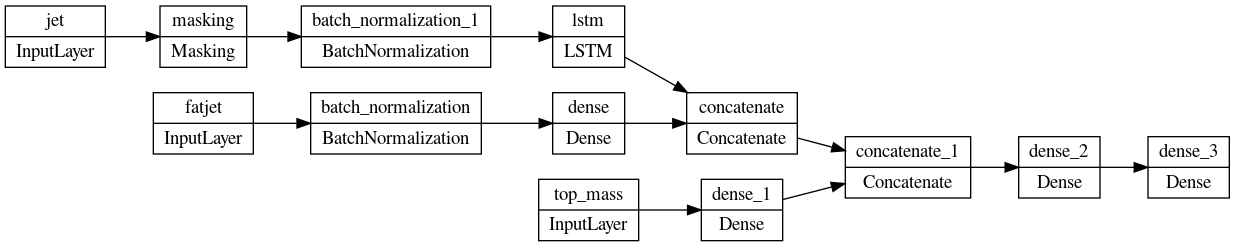

In [39]:
tf.keras.utils.plot_model(model,rankdir='LR',expand_nested=True)

In [41]:
folder_model = "/eos/home-a/acagnott/SWAN_projects/DM/DNNmodel/DNN_phase1_test_lowpt_DNN/"#"/eos/home-a/acagnott/SWAN_projects/DM/DNNmodel/"
model_name = 'DNN_phase1_test_lowpt_DNN.h5'#"DNN_phase1_test.h5"#"DNN_withtopmass.h5"
model = keras.models.load_model(folder_model+model_name)

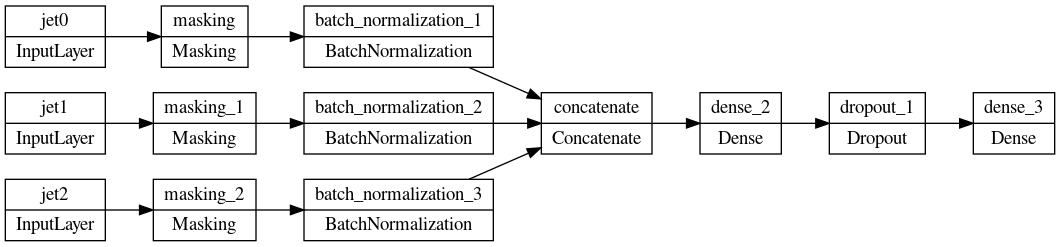

In [42]:
tf.keras.utils.plot_model(model,rankdir='LR',expand_nested=True)

In [5]:
events['tdm'].TopHighPt.truth[0]

<Array [1, 0, 0, 0, 0, 0, ... 1, 0, 0, 0, 0, 0] type='14 * float32[parameters={"...'>

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Signals TopLowPt pt from TT_Mtt1000_inf')

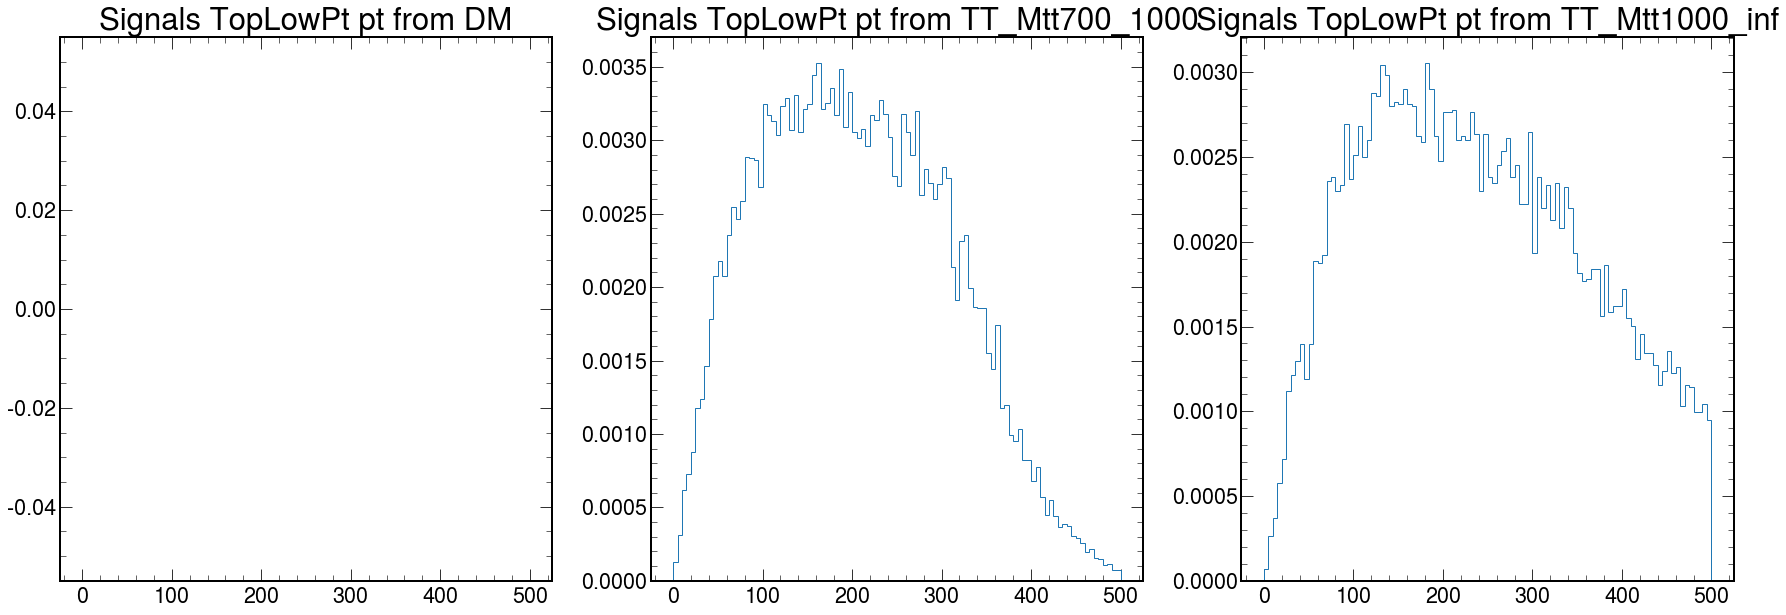

In [5]:
rg = [0,500]
bins = 100
log = False
fig, ax = plt.subplots(ncols =3, figsize = (30,10))
sdm = 'tdm'
ax[0].hist(ak.flatten(events[sdm].TopLowPt.pt[(events[sdm].TopLowPt.truth==1)]),
           histtype='step', density=True, range = rg, bins=bins)
if log: ax[0].set_yscale('Log')
ax[0].set_title('Signals TopLowPt pt from DM')
stt1 = 'tt700-1000'
ax[1].hist(ak.flatten(events[stt1].TopLowPt.pt[(events[stt1].TopLowPt.truth==1)]),
           histtype='step', density=True, range = rg, bins=bins)
if log: ax[1].set_yscale('Log')
ax[1].set_title('Signals TopLowPt pt from TT_Mtt700_1000')
stt2 = 'tt1000-inf'
ax[2].hist(ak.flatten(events[stt2].TopLowPt.pt[(events[stt2].TopLowPt.truth==1)]),
           histtype='step', density=True, range = rg, bins=bins)
if log: ax[2].set_yscale('Log')
ax[2].set_title('Signals TopLowPt pt from TT_Mtt1000_inf')

Text(0.5, 1.0, 'Signals TopHighPt pt from TT_Mtt1000_inf')

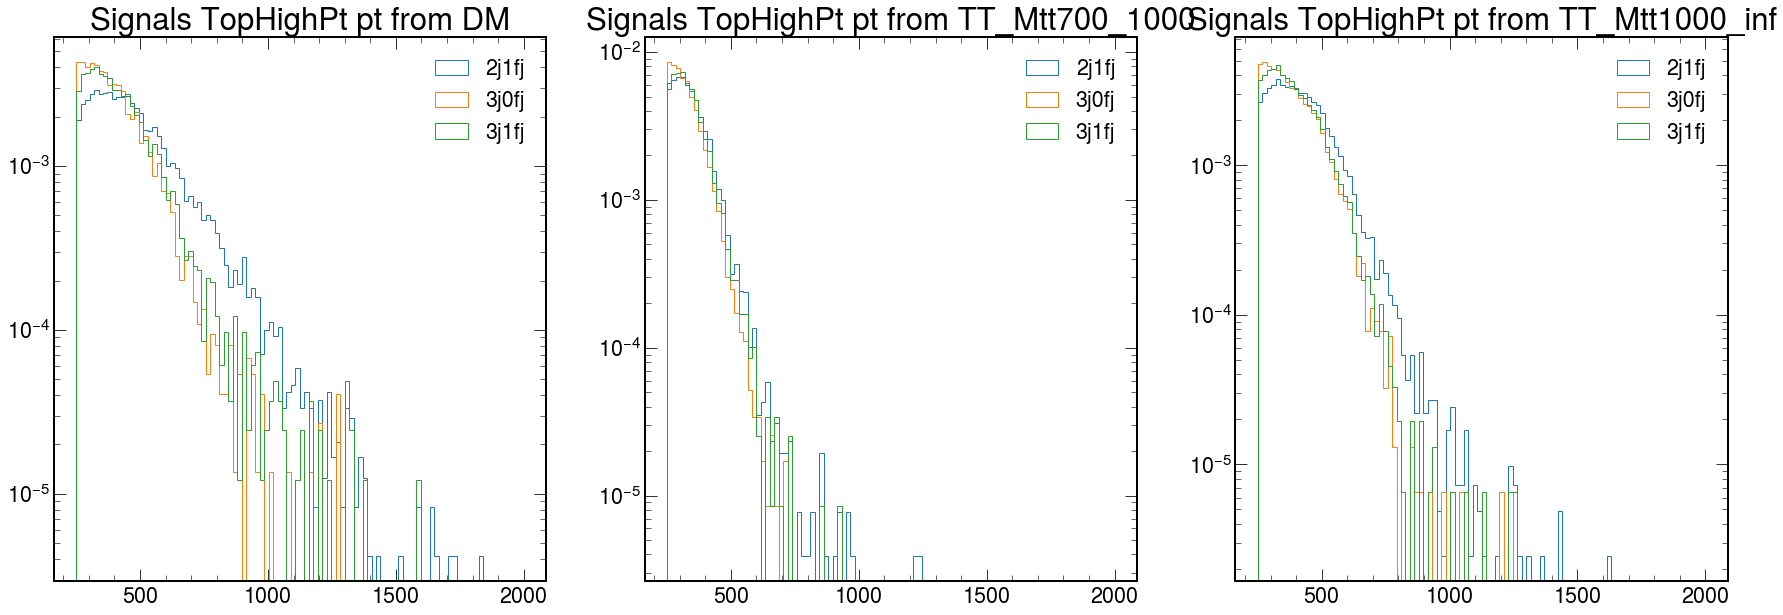

In [8]:
rg = [250,2000]
bins = 100
fig, ax = plt.subplots(ncols =3, figsize = (30,10))
sdm = 'tdm'
ax[0].hist(ak.flatten(events[sdm].TopHighPt.pt[(events[sdm].TopHighPt.truth==1)*(events[sdm].TopHighPt.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].hist(ak.flatten(events[sdm].TopHighPt.pt[(events[sdm].TopHighPt.truth==1)*(events[sdm].TopHighPt.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].hist(ak.flatten(events[sdm].TopHighPt.pt[(events[sdm].TopHighPt.truth==1)*(events[sdm].TopHighPt.idxFatJet!=-1)*(events[sdm].TopHighPt.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].legend()
ax[0].set_yscale('Log')
ax[0].set_title('Signals TopHighPt pt from DM')
stt1 = 'tt700-1000'
ax[1].hist(ak.flatten(events[stt1].TopHighPt.pt[(events[stt1].TopHighPt.truth==1)*(events[stt1].TopHighPt.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].hist(ak.flatten(events[stt1].TopHighPt.pt[(events[stt1].TopHighPt.truth==1)*(events[stt1].TopHighPt.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].hist(ak.flatten(events[stt1].TopHighPt.pt[(events[stt1].TopHighPt.truth==1)*(events[stt1].TopHighPt.idxFatJet!=-1)*(events[stt1].TopHighPt.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].legend()
ax[1].set_yscale('Log')
ax[1].set_title('Signals TopHighPt pt from TT_Mtt700_1000')
stt2 = 'tt1000-inf'
ax[2].hist(ak.flatten(events[stt2].TopHighPt.pt[(events[stt2].TopHighPt.truth==1)*(events[stt2].TopHighPt.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].hist(ak.flatten(events[stt2].TopHighPt.pt[(events[stt2].TopHighPt.truth==1)*(events[stt2].TopHighPt.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].hist(ak.flatten(events[stt2].TopHighPt.pt[(events[stt2].TopHighPt.truth==1)*(events[stt2].TopHighPt.idxFatJet!=-1)*(events[stt2].TopHighPt.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].legend()
ax[2].set_yscale('Log')
ax[2].set_title('Signals TopHighPt pt from TT_Mtt1000_inf')

In [6]:
events['tdm'].TopLowPt.scoreLSTM

<Array [[0.0116, 0.241, ... 0.00701, 0.133]] type='27000 * var * float32[paramet...'>

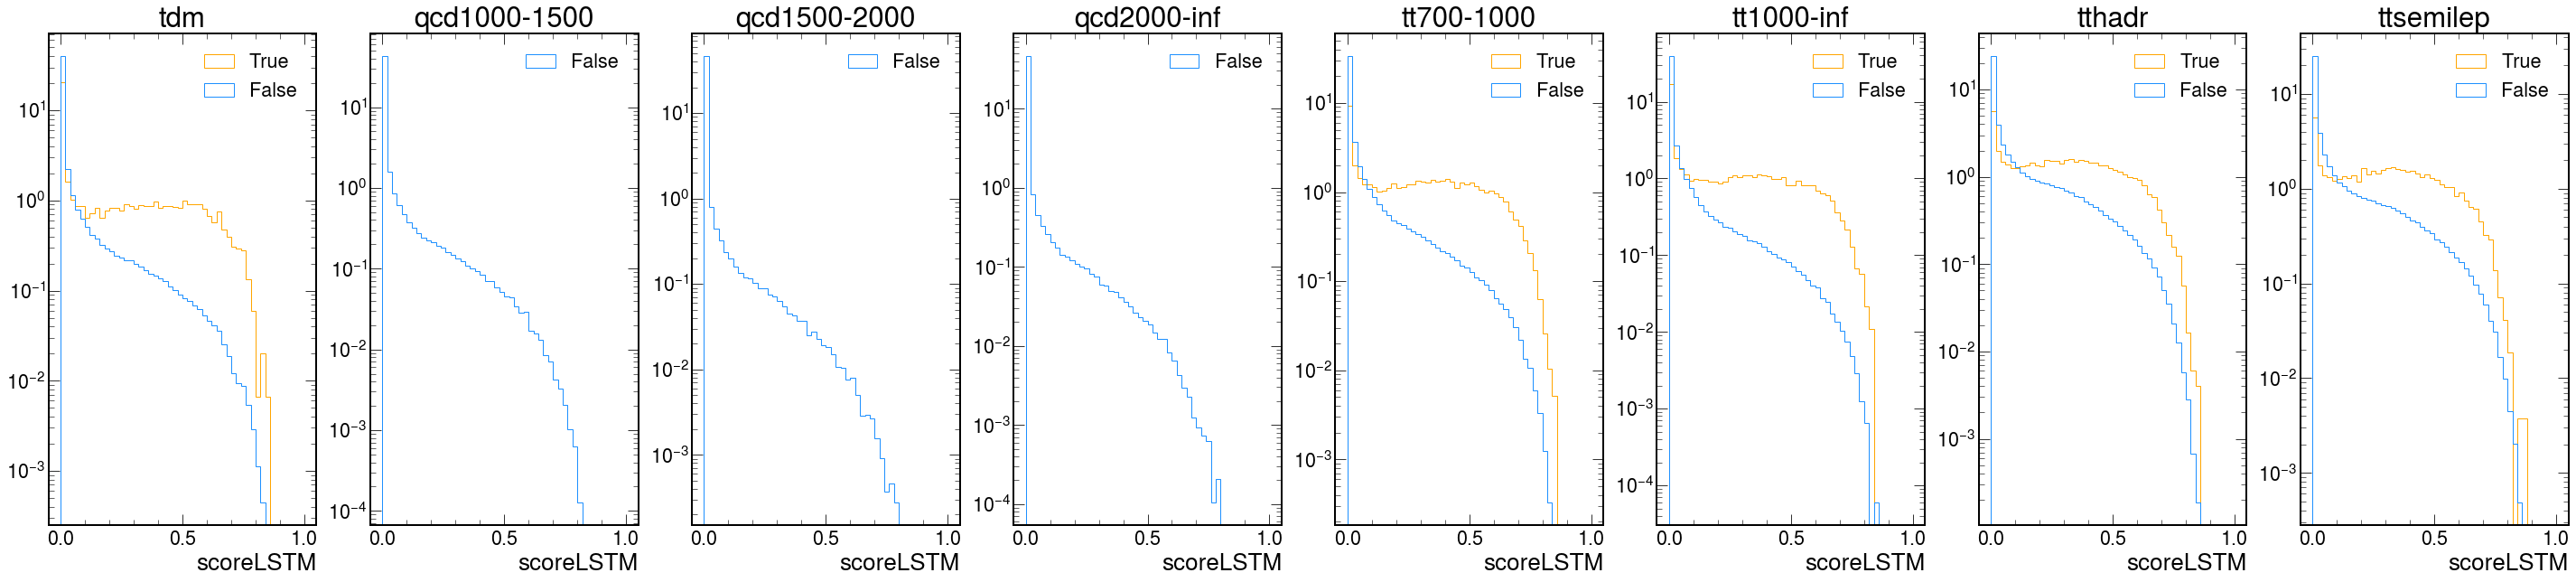

In [6]:
bins, rg = 50, [0,1]
fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
for i, s in enumerate(samples.keys()):
    x1 = ak.flatten(events[s].TopLowPt.scoreLSTM[events[s].TopLowPt.truth==1])
    x2 = ak.flatten(events[s].TopLowPt.scoreLSTM[events[s].TopLowPt.truth==0])
    if not 'qcd' in s:
        ax[i].hist(x1, 
            bins=bins, range = rg, density = True, color= 'orange', label = 'True', histtype='step')
    ax[i].hist(x2, 
            bins=bins, range = rg, density = True, color= 'dodgerblue', label = 'False', histtype='step')
    ax[i].set_title(s )
    ax[i].set_xlabel('scoreLSTM')
    ax[i].set_yscale('Log')
    ax[i].legend()

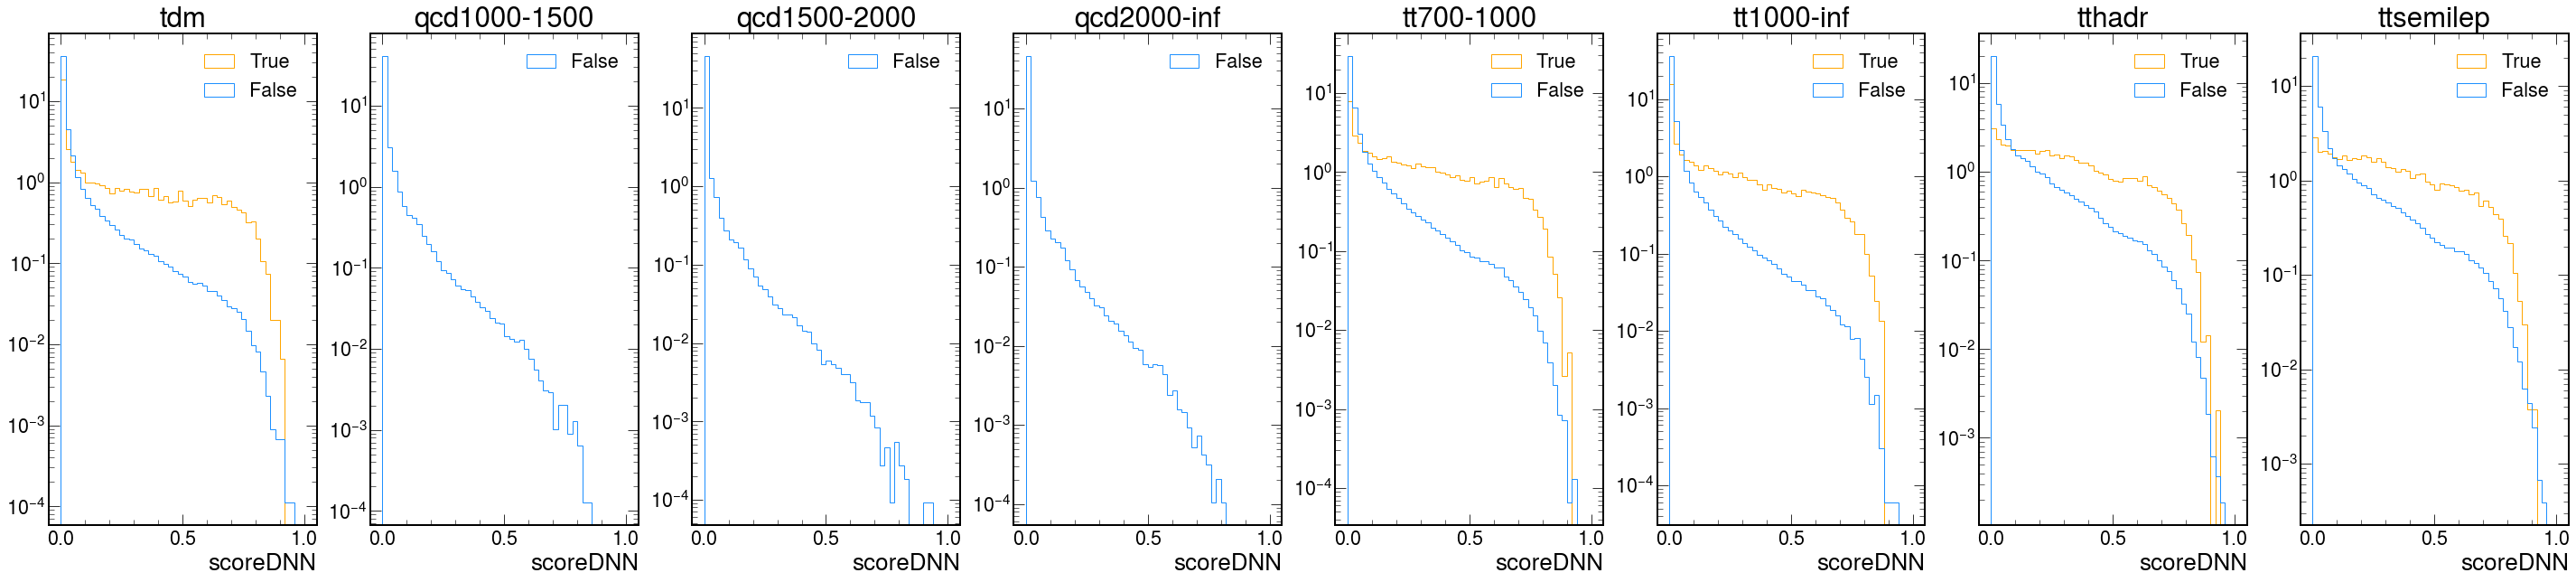

In [7]:
bins, rg = 50, [0,1]
fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
for i, s in enumerate(samples.keys()):
    x1 = ak.flatten(events[s].TopLowPt.scoreDNN[events[s].TopLowPt.truth==1])
    x2 = ak.flatten(events[s].TopLowPt.scoreDNN[events[s].TopLowPt.truth==0])
    if not 'qcd' in s:
        ax[i].hist(x1, 
            bins=bins, range = rg, density = True, color= 'orange', label = 'True', histtype='step')
    ax[i].hist(x2, 
            bins=bins, range = rg, density = True, color= 'dodgerblue', label = 'False', histtype='step')
    ax[i].set_title(s)
    ax[i].set_xlabel('scoreDNN')
    ax[i].set_yscale('Log')
    ax[i].legend()

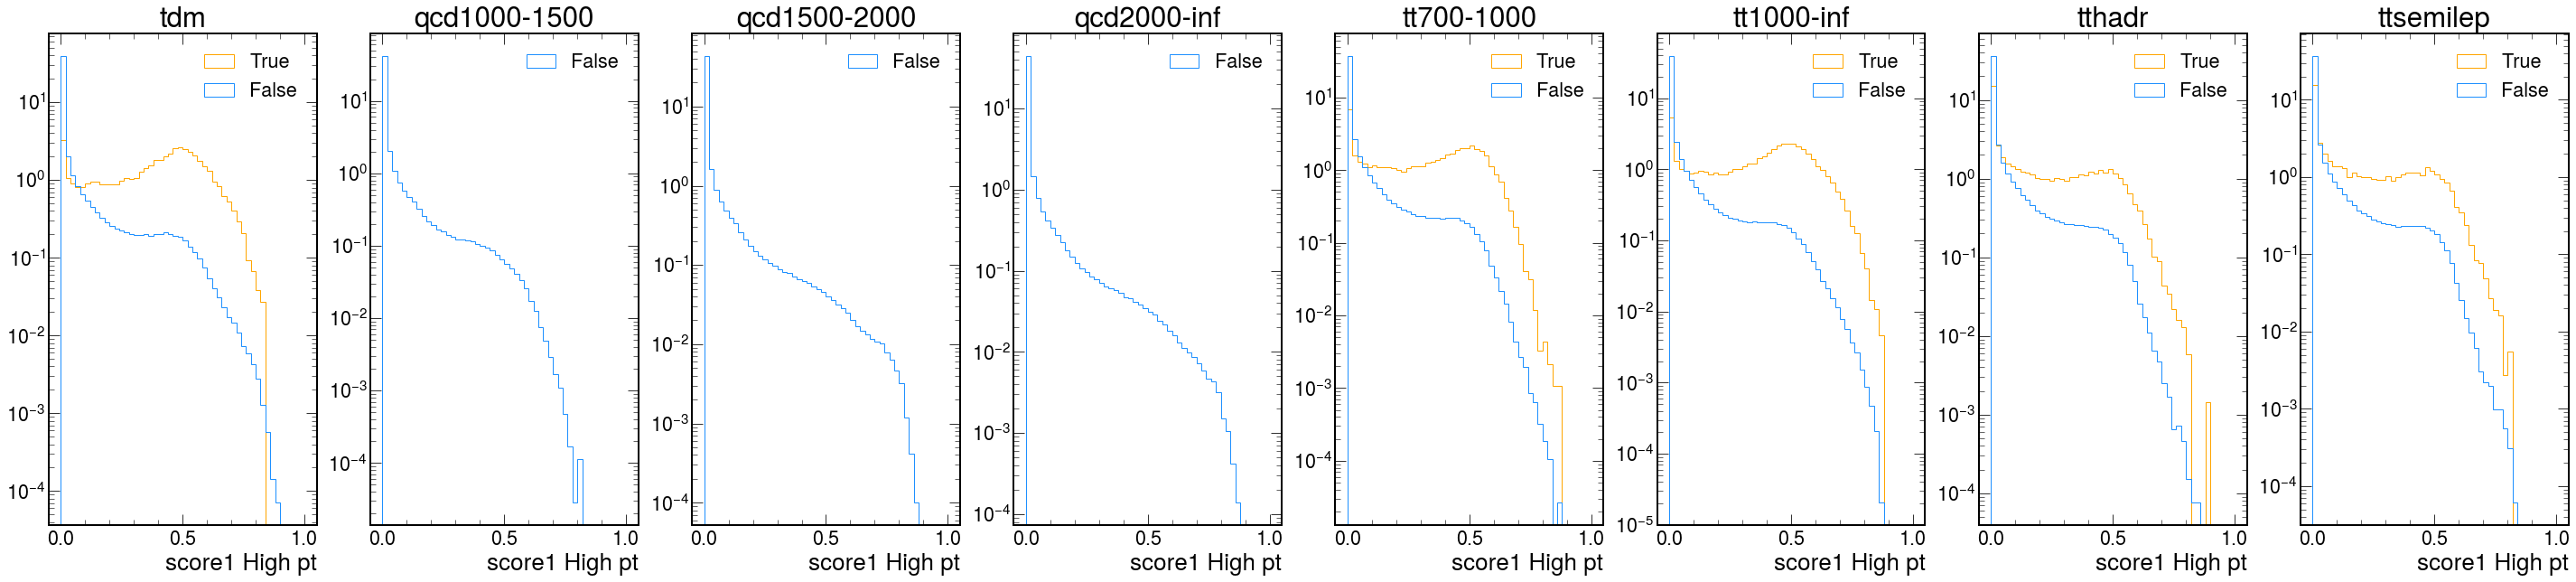

In [8]:
bins, rg = 50, [0,1]
fig, ax = plt.subplots( ncols = len(samples.keys()), figsize = (50,10))
for i, s in enumerate(samples.keys()):
    x1 = ak.flatten(events[s].TopHighPt.score[events[s].TopHighPt.truth==1])
    x2 = ak.flatten(events[s].TopHighPt.score[events[s].TopHighPt.truth==0])
    if not 'qcd' in s:
        ax[i].hist(x1, 
            bins=bins, range = rg, density = True, color= 'orange', label = 'True', histtype='step')
    ax[i].hist(x2, 
            bins=bins, range = rg, density = True, color= 'dodgerblue', label = 'False', histtype='step')
    ax[i].set_title(s)
    ax[i].set_xlabel('score1 High pt')
    ax[i].set_yscale('Log')
    ax[i].legend()

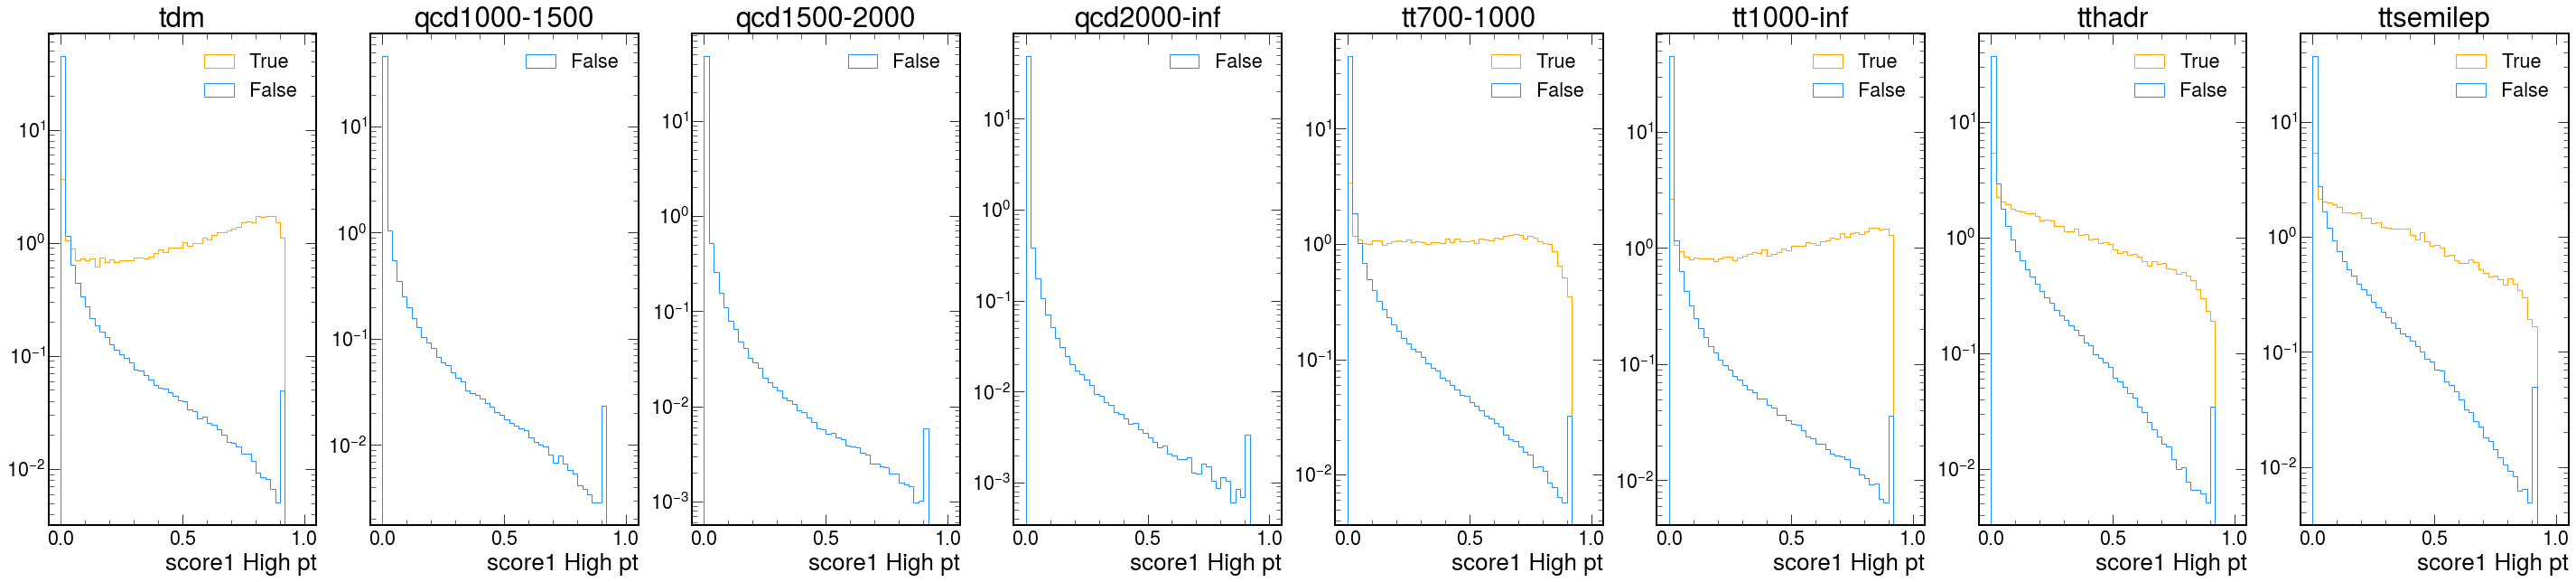

In [9]:
bins, rg = 50, [0,1]
fig, ax = plt.subplots( ncols = len(samples.keys()), figsize = (50,10))
for i, s in enumerate(samples.keys()):
    x1 = ak.flatten(events[s].TopHighPt.score2[events[s].TopHighPt.truth==1])
    x2 = ak.flatten(events[s].TopHighPt.score2[events[s].TopHighPt.truth==0])
    if not 'qcd' in s:
        ax[i].hist(x1, 
            bins=bins, range = rg, density = True, color= 'orange', label = 'True', histtype='step')
    ax[i].hist(x2, 
            bins=bins, range = rg, density = True, color= 'dodgerblue', label = 'False', histtype='step')
    ax[i].set_title(s)
    ax[i].set_xlabel('score1 High pt')
    ax[i].set_yscale('Log')
    ax[i].legend()

In [7]:
with open("./DNNmodel/DNN_phase1_test_lowpt_LSTM/tresholds_LSTM.pkl", "rb") as f:
    trs_lowptLSTM = pkl.load(f)
with open("./DNNmodel/DNN_phase1_test_lowpt_DNN/tresholds_DNN.pkl", "rb") as f:
    trs_lowptDNN = pkl.load(f)    
with open("./DNNmodel/DNN_phase1_test_highpt/tresholds.pkl", "rb") as f:
    trs_highpt = pkl.load(f)
with open("./DNNmodel/DNN_phase2_test2/tresholds.pkl", "rb") as f:
    trs_highpt_2 = pkl.load(f)

In [9]:
def plt_ptbins(events, model, trs, bins, minpt, maxpt):# model= 'highpt_phase1','highpt_phase2','lowpt_LSTM','lowpt_DNN'
    step = (maxpt-minpt)/bins
    x_array = np.arange(minpt, maxpt, step)
    # top evaluation
    if 'highpt' in model:
        top = events.TopHighPt
        if 'phase2' in model:
            top_over_trs = top.score2>trs
        elif 'phase1' in model:
            top_over_trs = top.score>trs
        elif 'comb' in model :
            top_over_trs_1 = top.score>trs[0]
            top_over_trs_2 = top.score>trs[1]
            top_over_trs = top_over_trs_1*top_over_trs_2
    elif 'lowpt' in model:
        top = events.TopLowPt
        if 'LSTM' in model:
            top_over_trs = top.scoreDNN>trs
        elif 'DNN' in model:
            top_over_trs = top.scoreLSTM>trs
    true_top = top.truth==1
    false_top = top.truth==0
    bins_centre = (x_array+(step/2)).tolist()
    sgneff=[]
    bkgeff=[]
    for b in x_array:
        if np.sum(true_top)>0:
            num = np.sum((top.pt[true_top*top_over_trs]>b)*(top.pt[true_top*top_over_trs]<b+step))
            den = np.sum((top.pt[true_top]>b)*(top.pt[true_top]<b+step))
            if den!=0:
                sgneff.append(num/den)
            else:
                sgneff.append(-1)
        num = np.sum((top.pt[false_top*top_over_trs]>b)*(top.pt[false_top*top_over_trs]<b+step))
        den = np.sum((top.pt[false_top]>b)*(top.pt[false_top]<b+step))
        if den!=0:
            bkgeff.append(num/den)
        else:
            bkgeff.append(-1)
    return sgneff, bkgeff, bins_centre

In [30]:
for 
y0, y1, x= plt_ptbins(events['tdm'], model='lowpt_DNN', trs=trs_lowptDNN['fpr 10'], bins=50, minpt=0, maxpt=250)

 pt signal/background efficiency Top Low Pt with DNN score at different fixed values of false positive rate


/tmp/ipykernel_524/1494830830.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


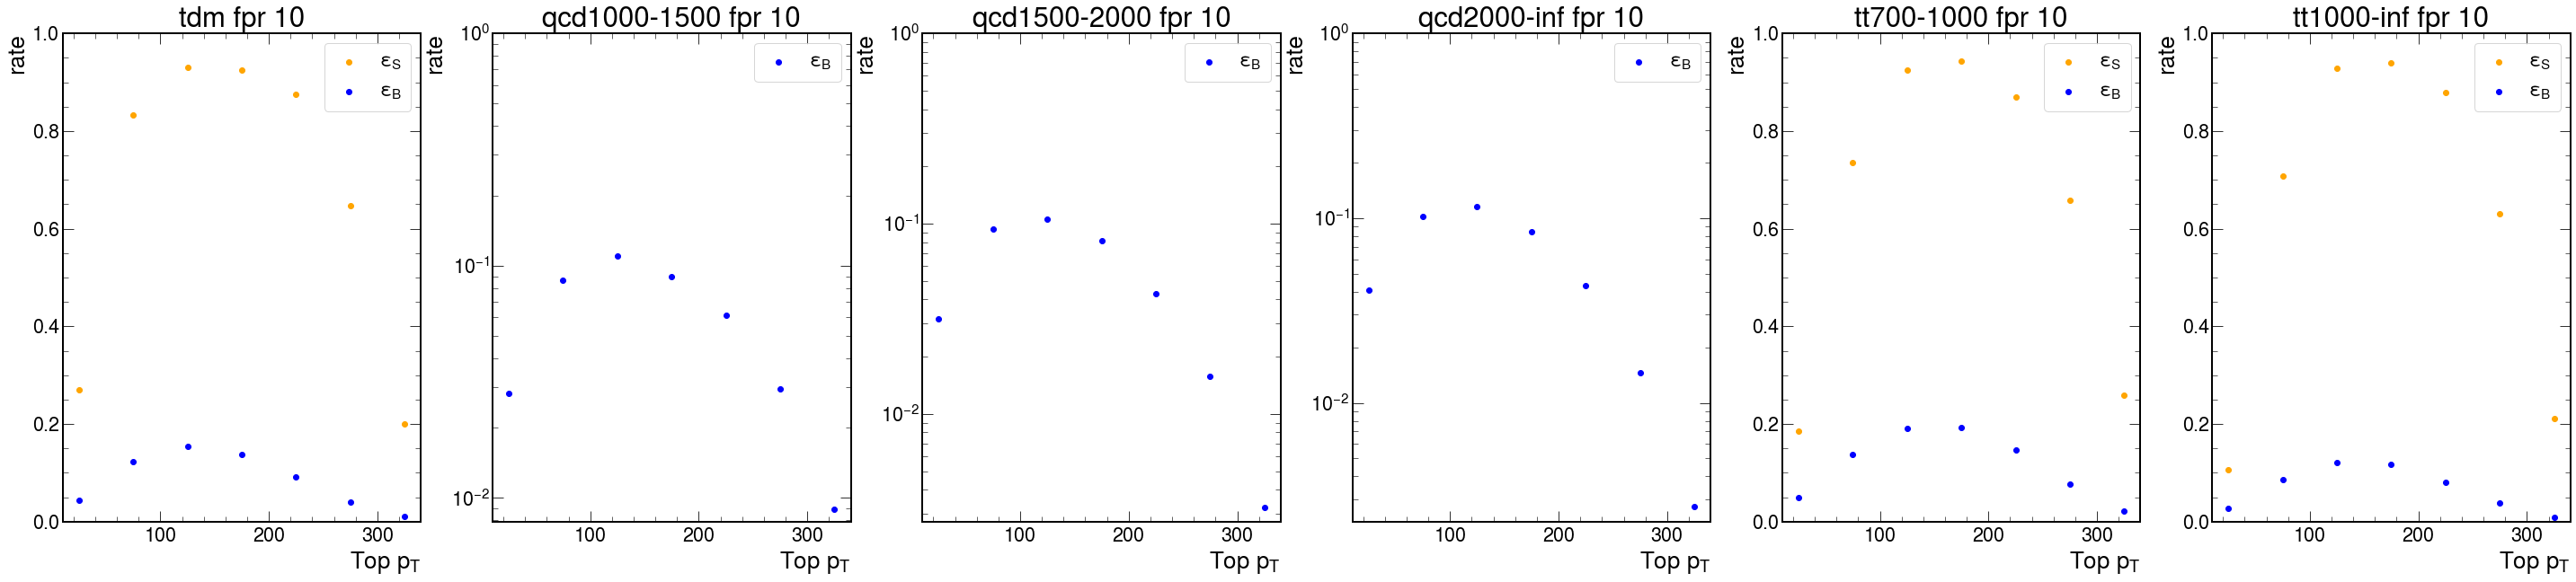

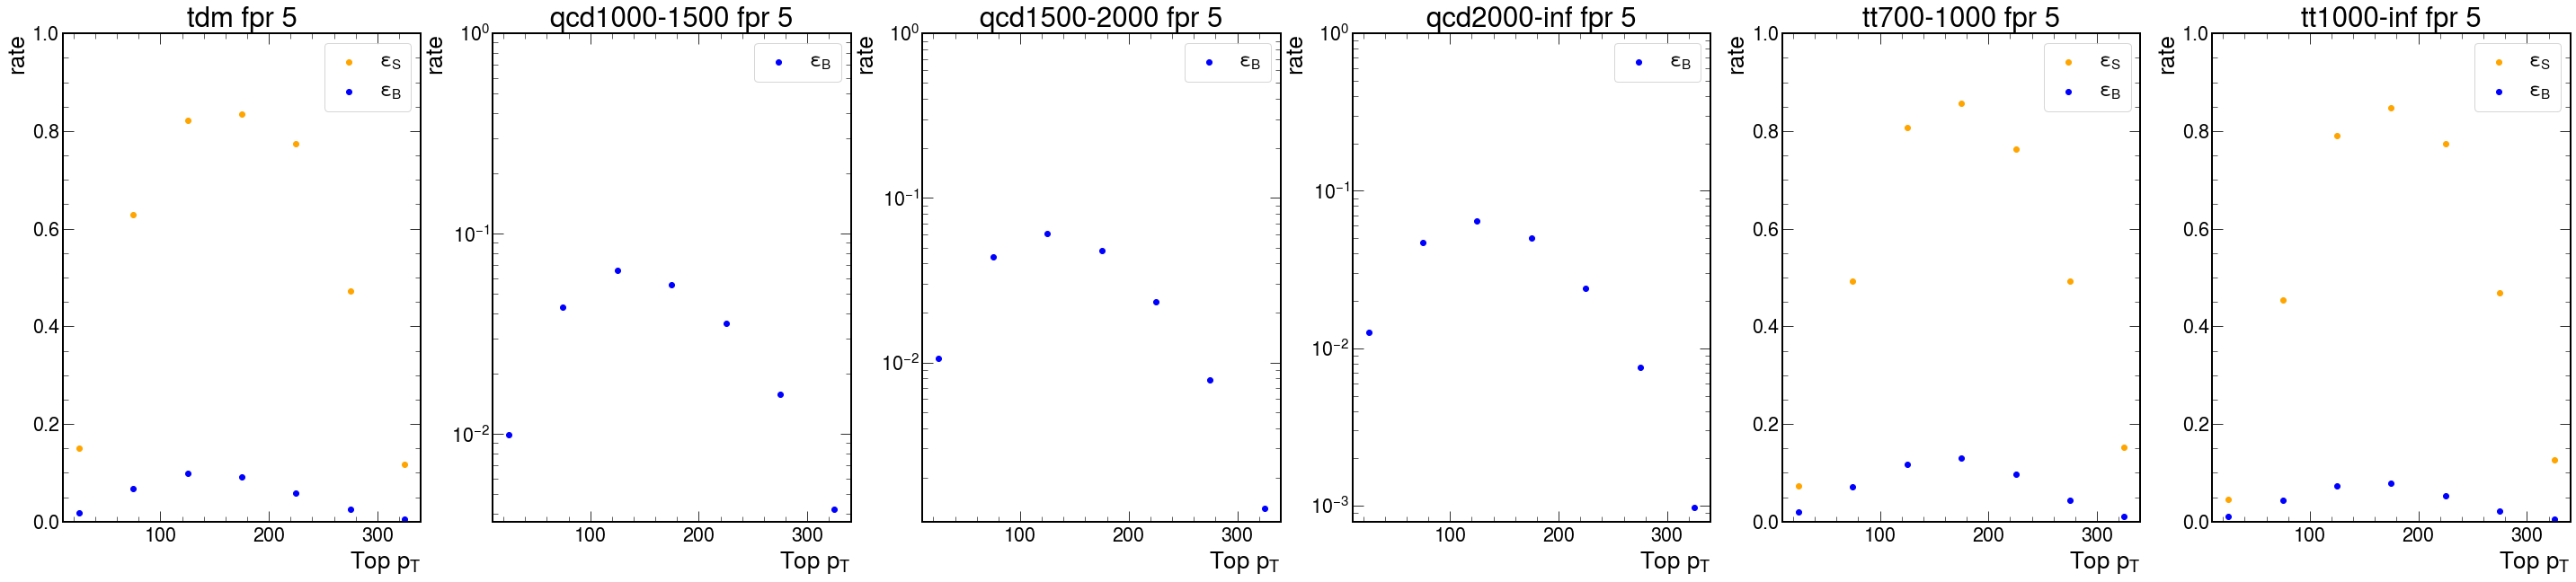

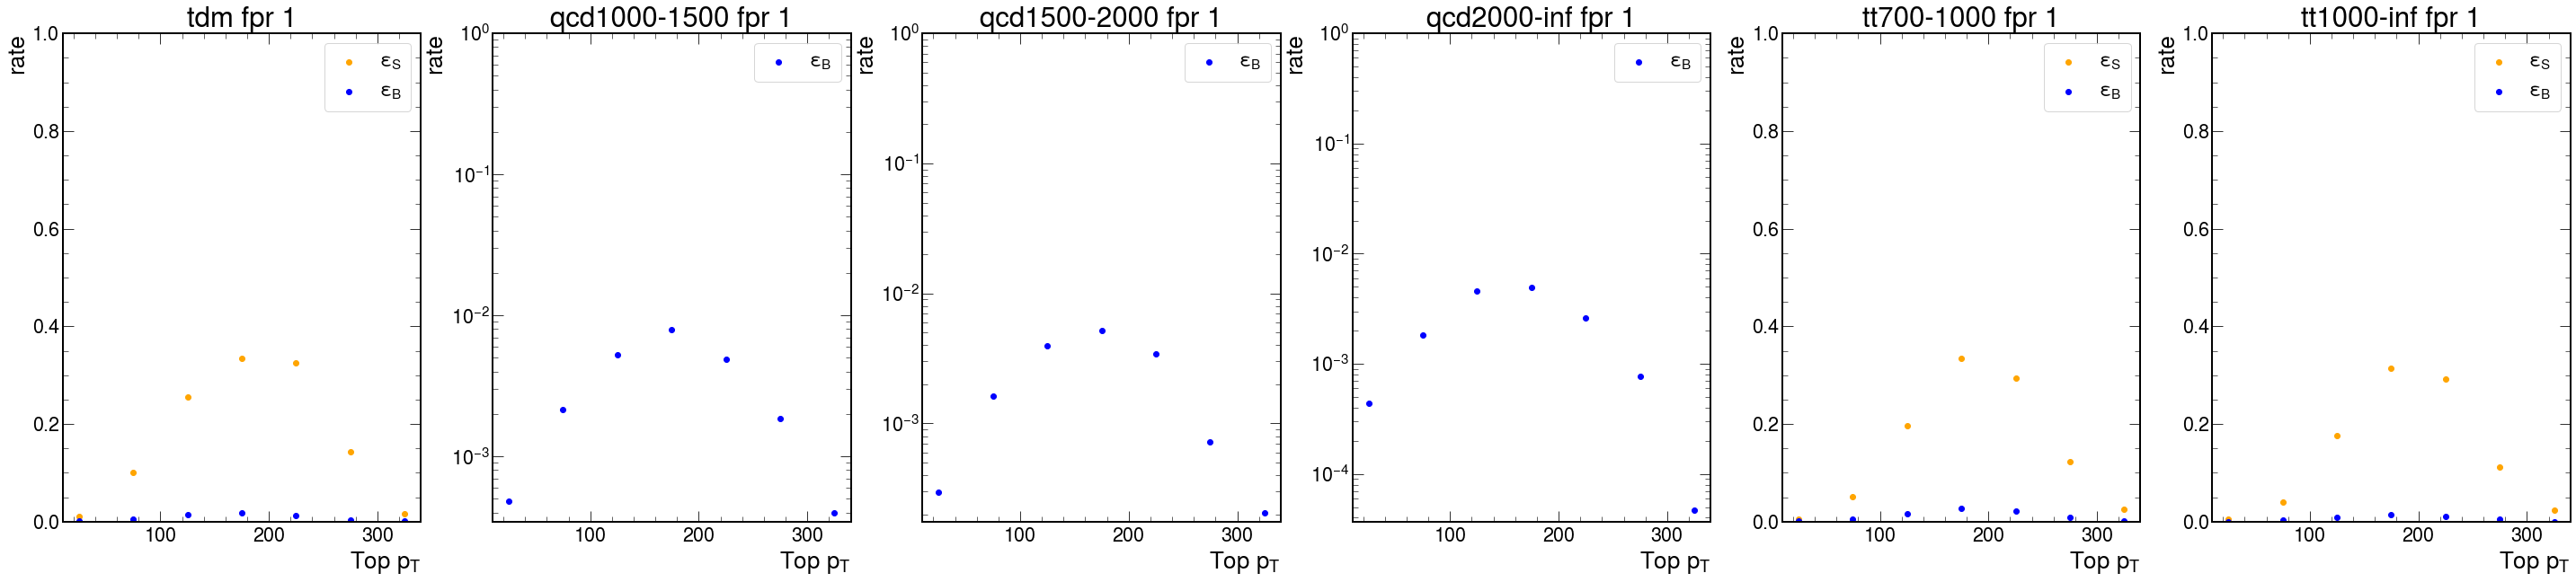

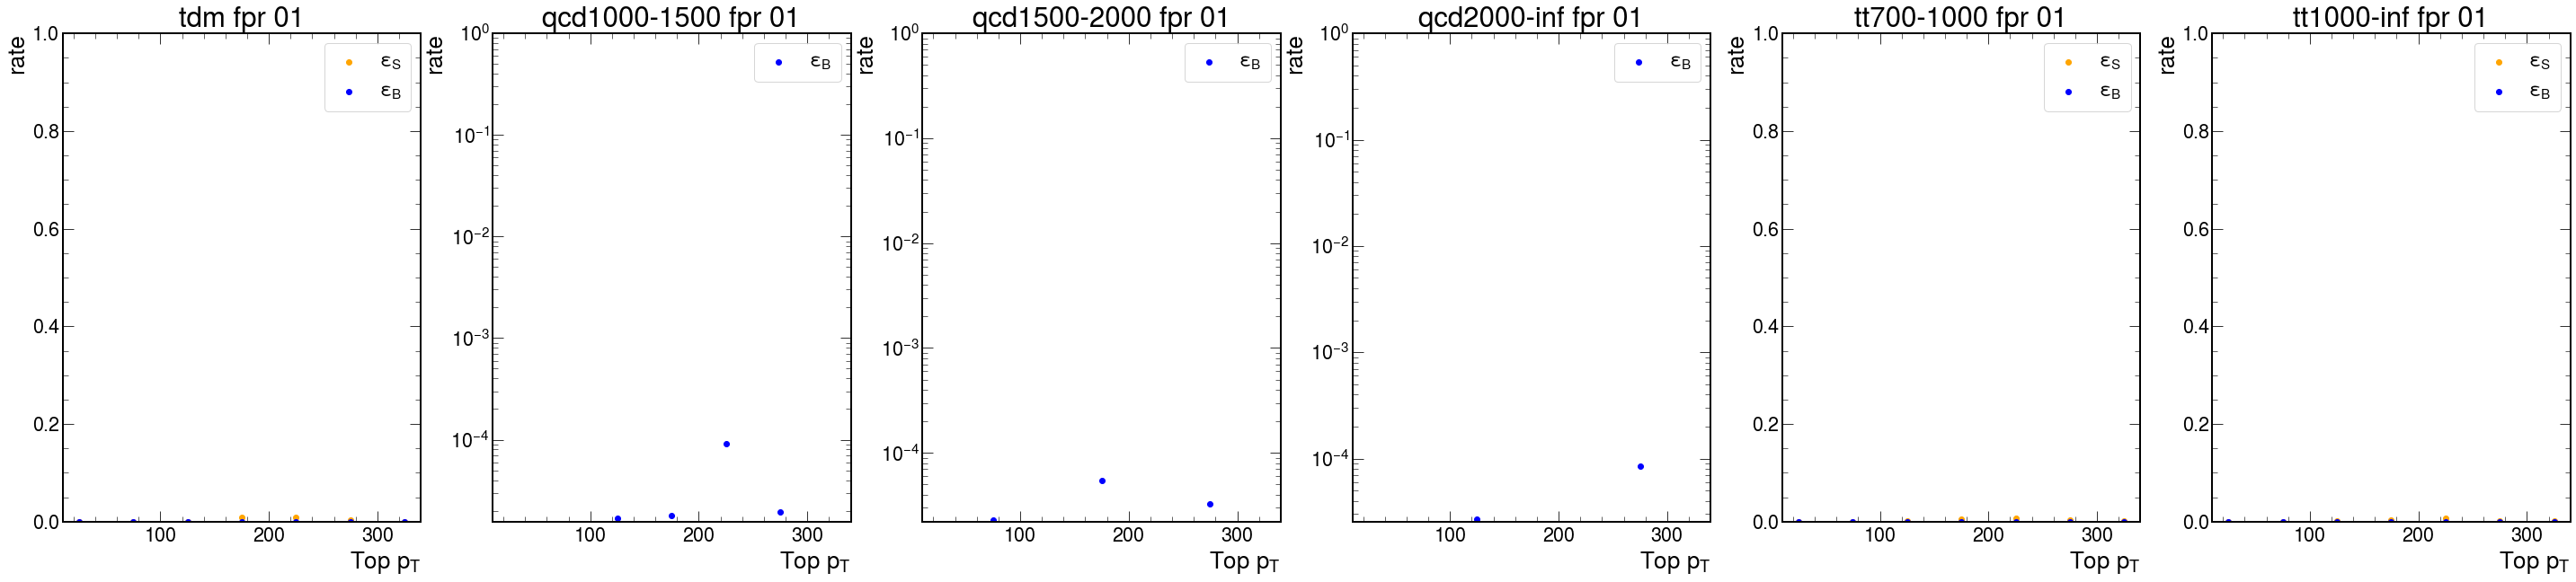

In [38]:
print(' pt signal/background efficiency Top Low Pt with DNN score at different fixed values of false positive rate')
for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
    fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
    for i, s in enumerate(samples.keys()):
        y_s, y_b, x = plt_ptbins(events[s], model='lowpt_DNN', trs=trs_lowptDNN[fpr], bins = 7, minpt=0, maxpt=350)    
        if 'qcd' not in s: ax[i].scatter(x, y_s, label = '$\epsilon_S$', c='orange')
        ax[i].scatter(x, y_b, label = '$\epsilon_B$', c='blue')
        ax[i].legend(frameon = True)
        if 'qcd' in s:ax[i].set_yscale('Log')
        ax[i].set_xlabel('Top $p_T$')
        ax[i].set_ylabel('rate')
        ax[i].set_ylim([0, 1])
        ax[i].set_title(s+' '+fpr)

 pt signal/background efficiency Top High Pt with phase1 score at different fixed values of false positive rate


/tmp/ipykernel_524/1426995663.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


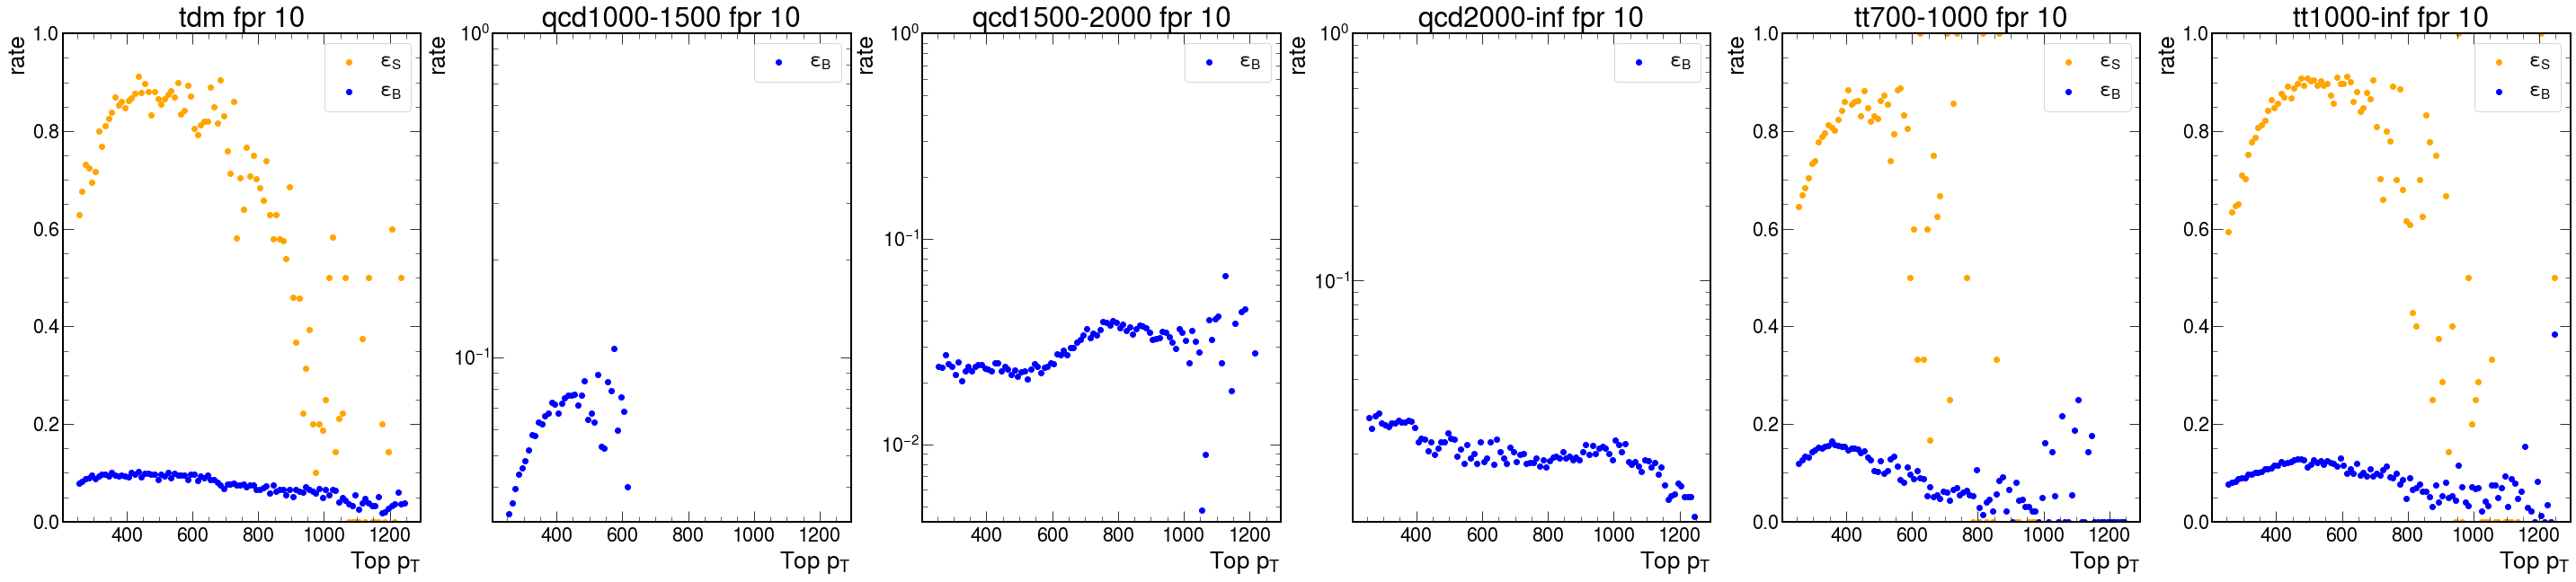

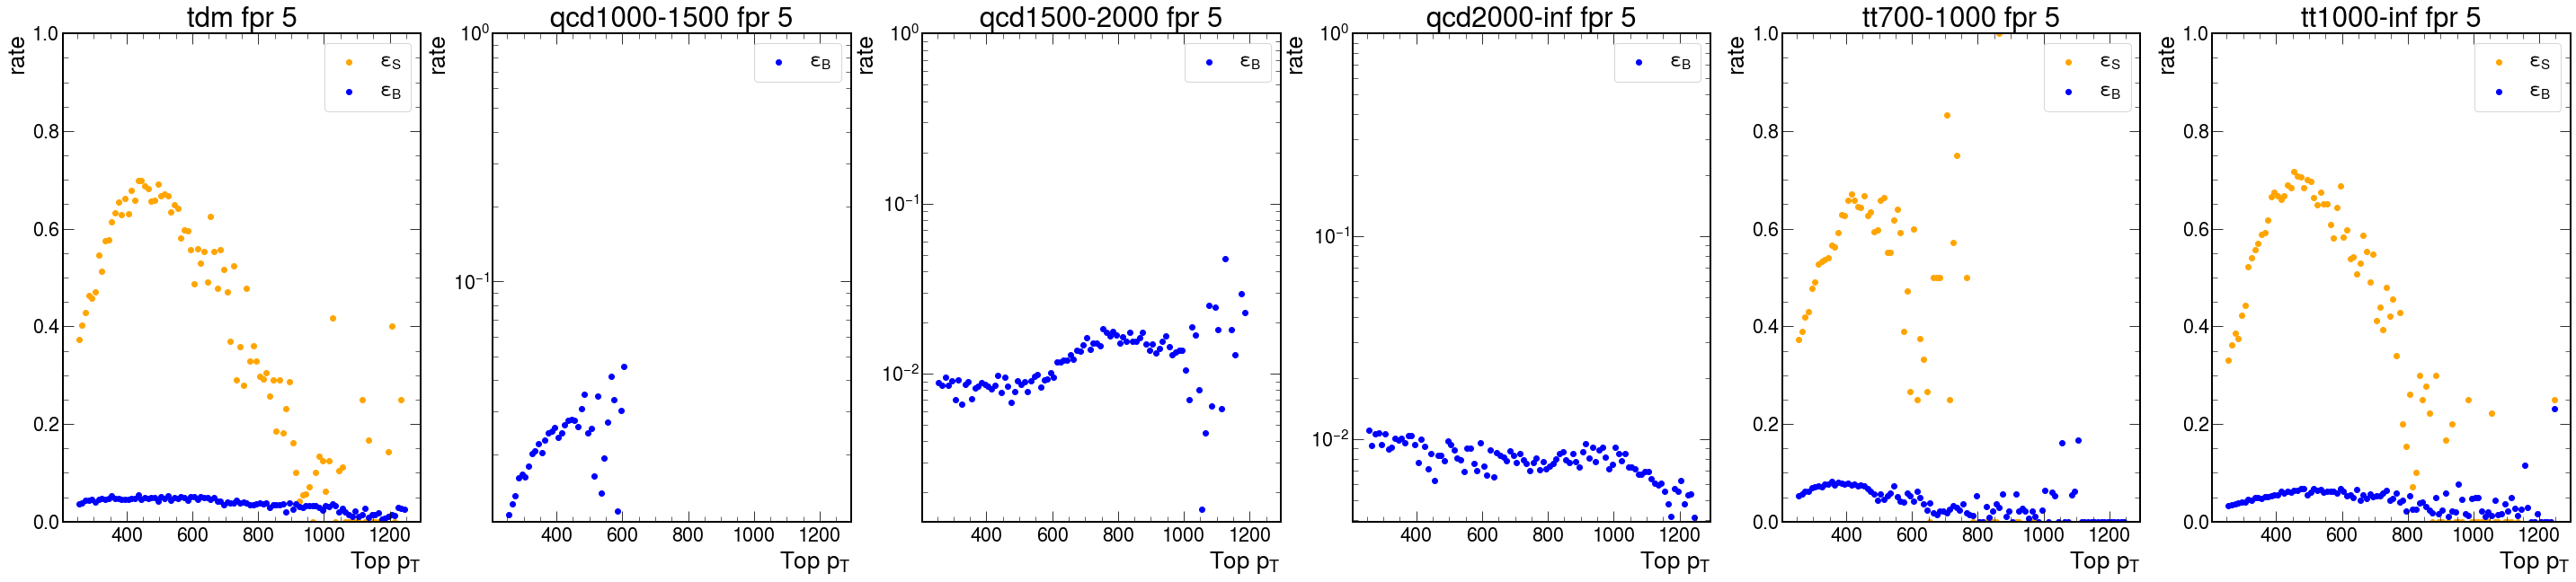

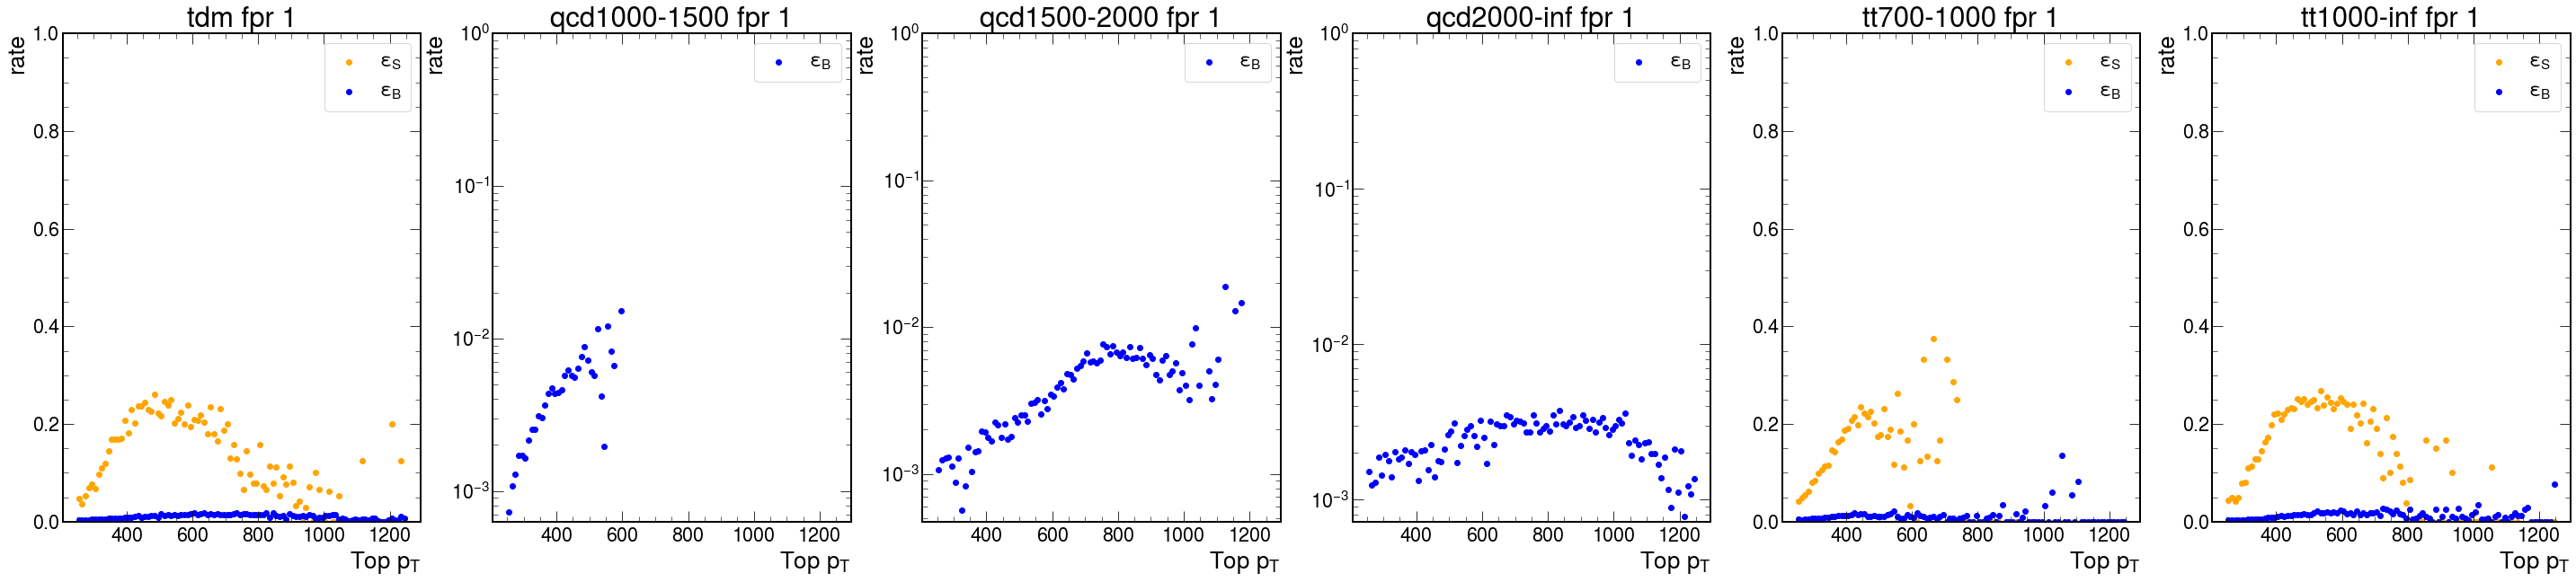

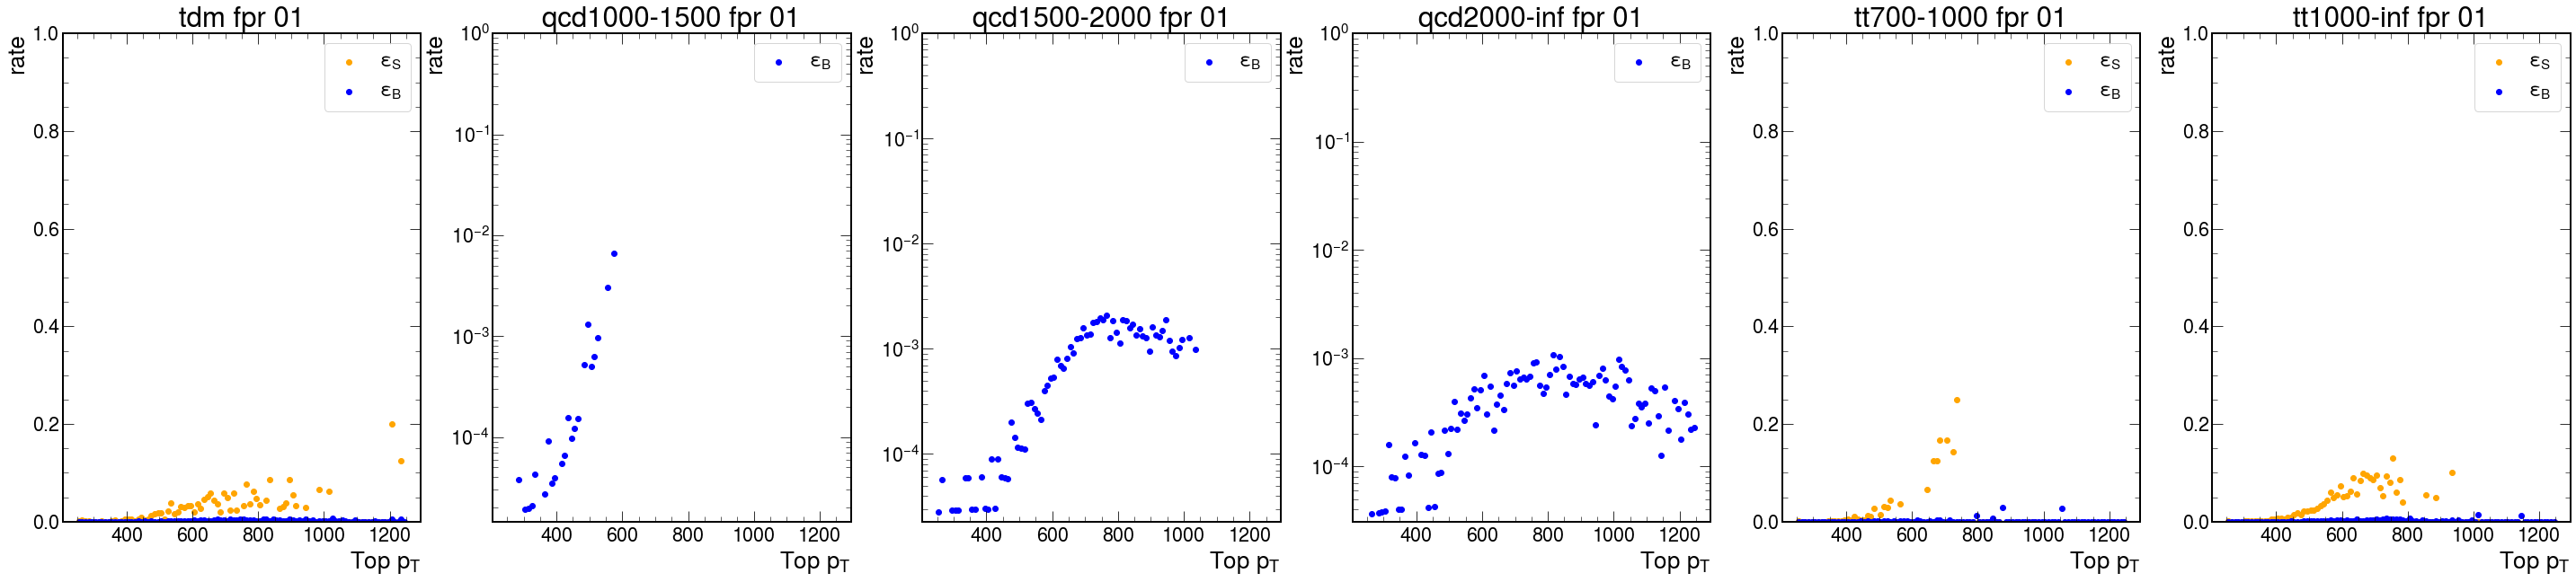

In [39]:
print(' pt signal/background efficiency Top High Pt with phase1 score at different fixed values of false positive rate')
for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
    fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
    for i, s in enumerate(samples.keys()):
        y_s, y_b, x = plt_ptbins(events[s], model='highpt_phase1', trs=trs_highpt[fpr], bins = 100, minpt=250, maxpt=1250)    
        if 'qcd' not in s: ax[i].scatter(x, y_s, label = '$\epsilon_S$', c='orange')
        ax[i].scatter(x, y_b, label = '$\epsilon_B$', c='blue')
        ax[i].legend(frameon = True)
        if 'qcd' in s:ax[i].set_yscale('Log')
        ax[i].set_xlabel('Top $p_T$')
        ax[i].set_ylabel('rate')
        ax[i].set_ylim([0, 1])
        ax[i].set_title(s+' '+fpr)

 pt signal/background efficiency Top High Pt with phase2 score at different fixed values of false positive rate


/tmp/ipykernel_781/3064915266.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


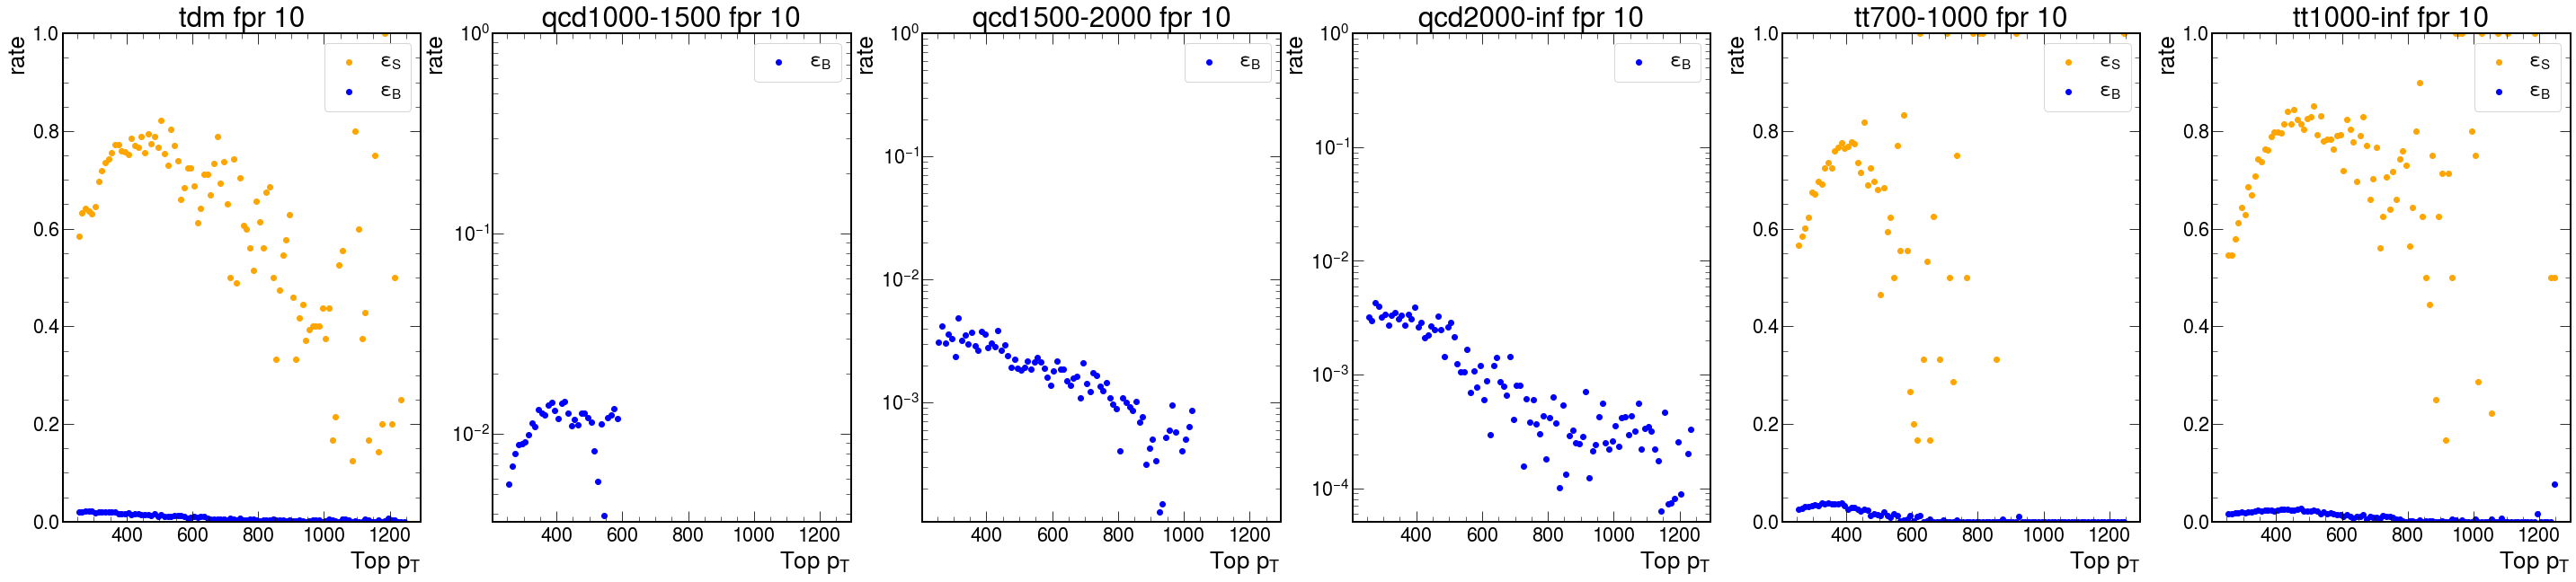

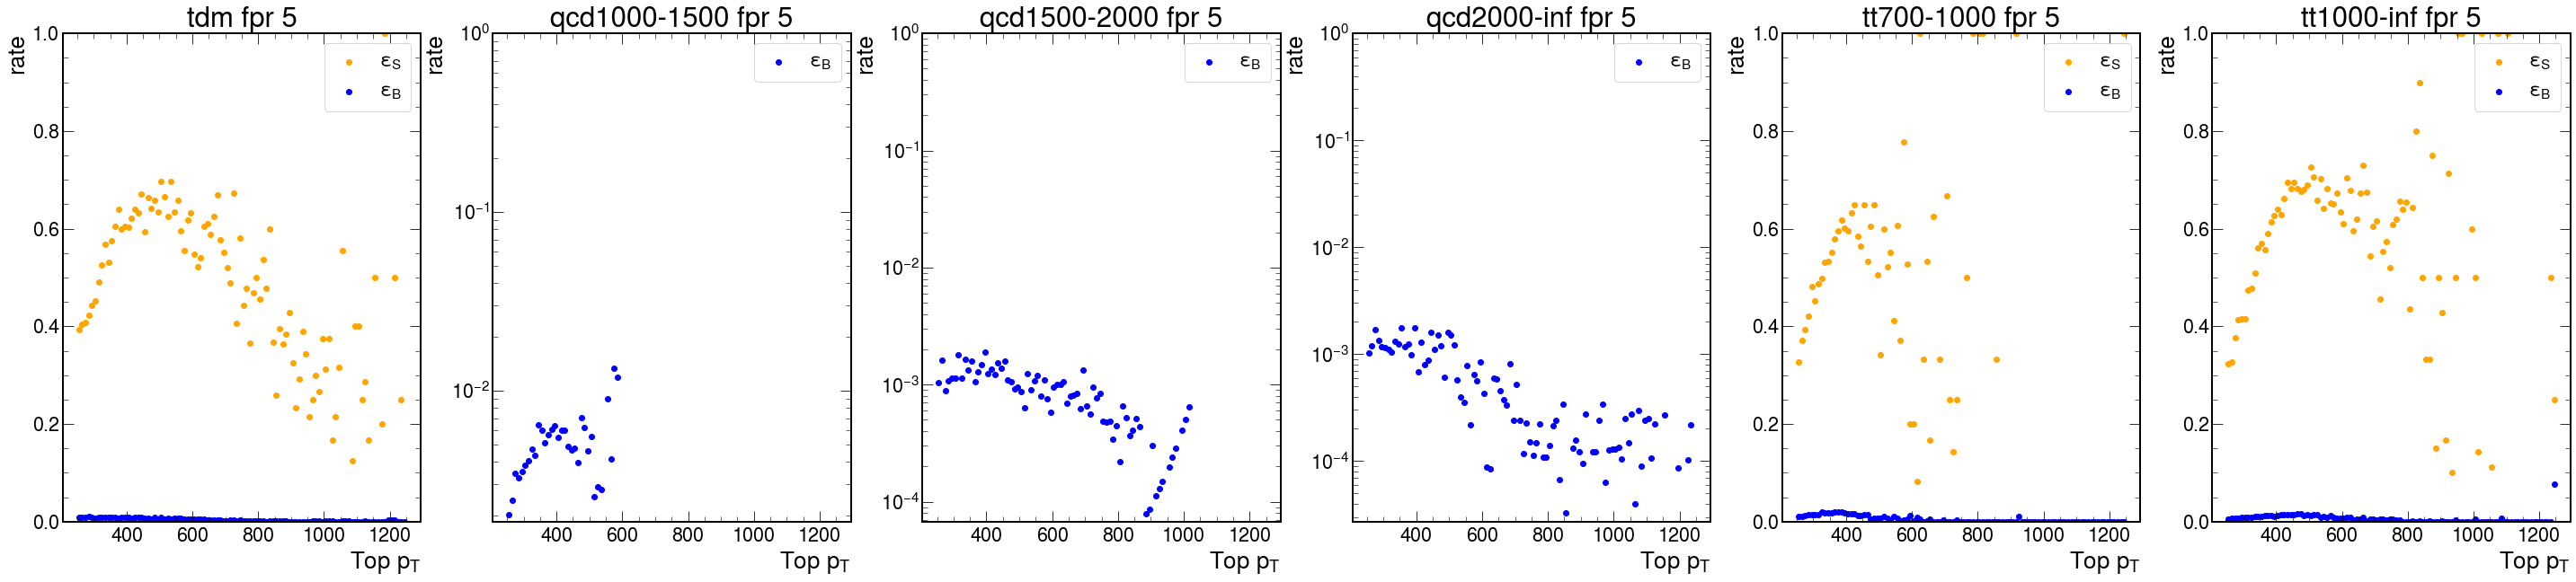

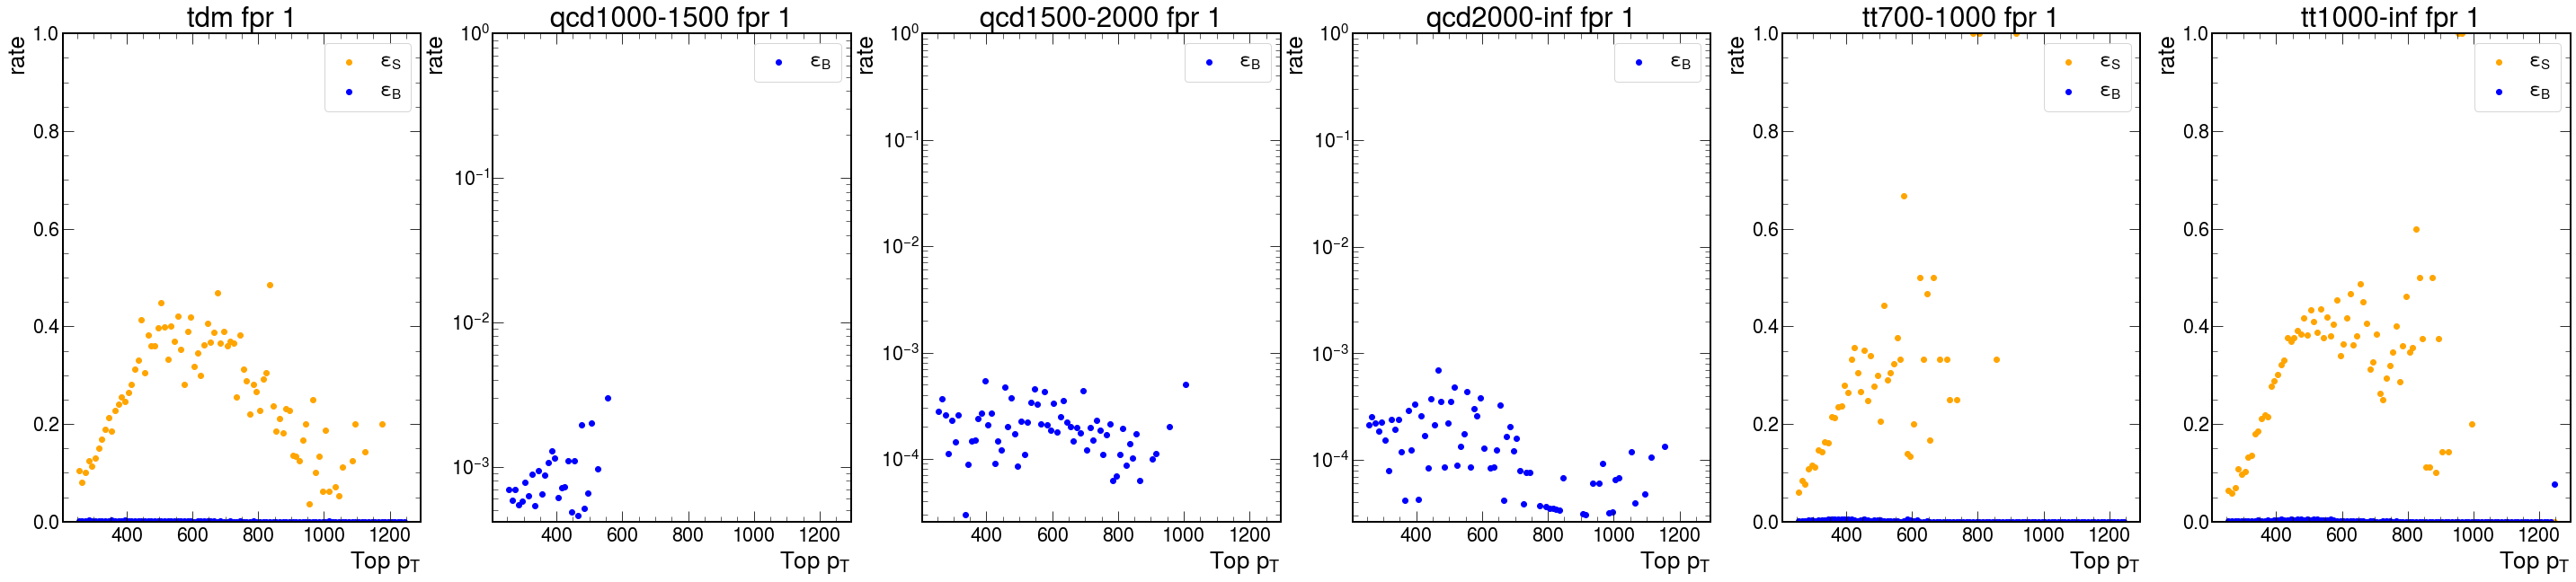

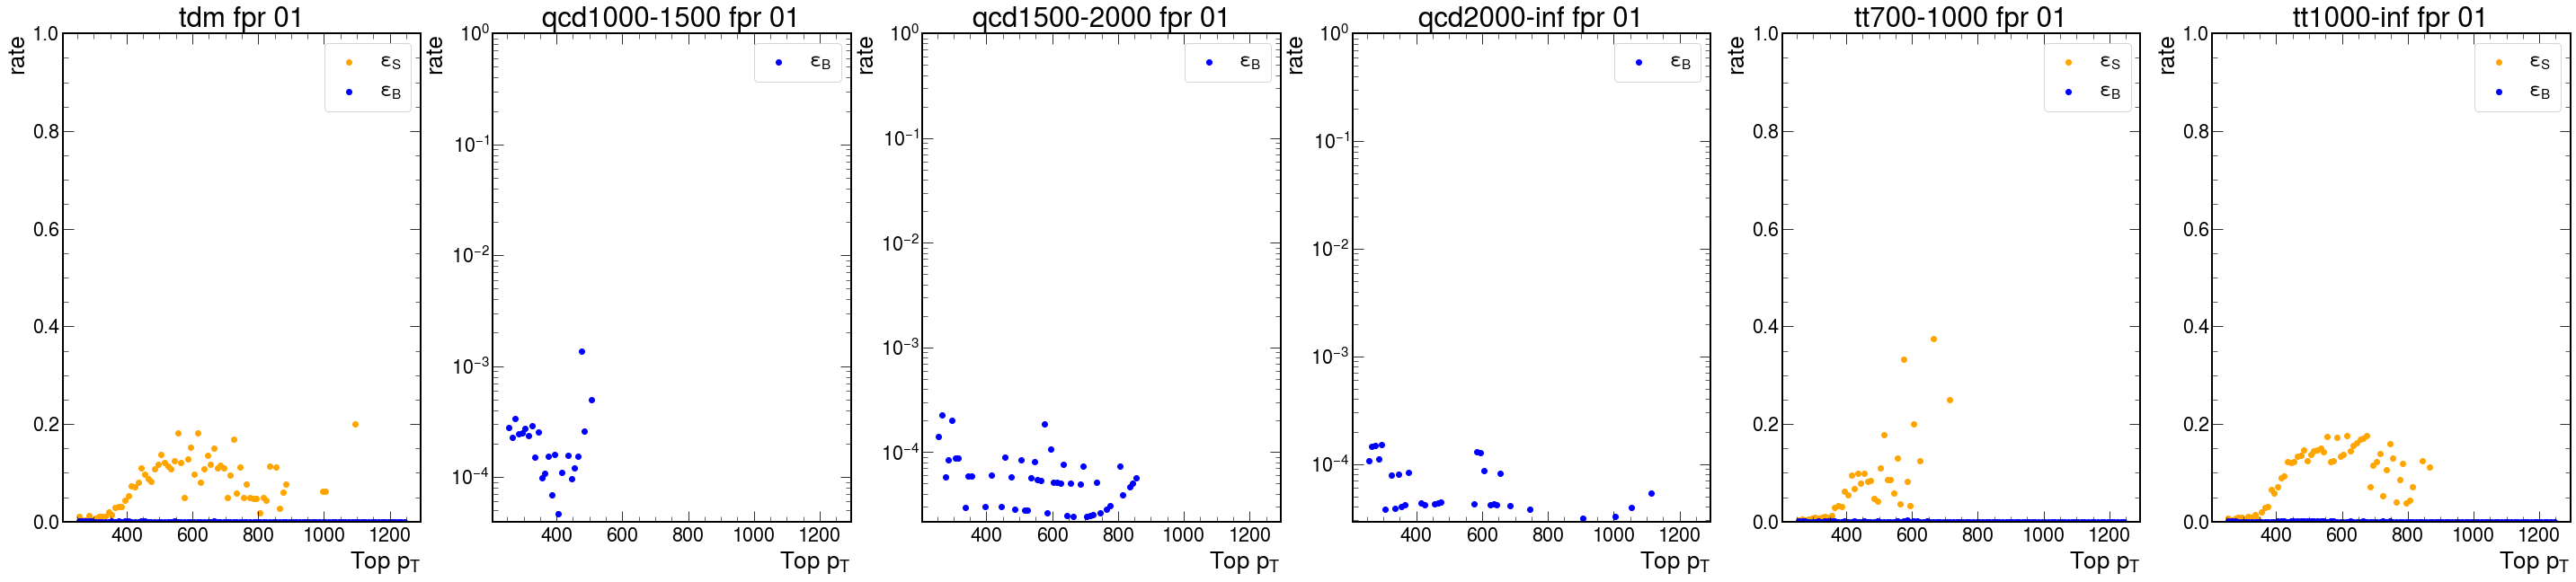

In [19]:
print(' pt signal/background efficiency Top High Pt with phase2 score at different fixed values of false positive rate')
for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
    fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
    for i, s in enumerate(samples.keys()):
        y_s, y_b, x = plt_ptbins(events[s], model='highpt_phase2', trs=trs_highpt_2[fpr], bins = 100, minpt=250, maxpt=1250)    
        if 'qcd' not in s: ax[i].scatter(x, y_s, label = '$\epsilon_S$', c='orange')
        ax[i].scatter(x, y_b, label = '$\epsilon_B$', c='blue')
        ax[i].legend(frameon = True)
        if 'qcd' in s:ax[i].set_yscale('Log')
        ax[i].set_xlabel('Top $p_T$')
        ax[i].set_ylabel('rate')
        ax[i].set_ylim([0, 1])
        ax[i].set_title(s+' '+fpr)

 pt signal/background efficiency Top High Pt with phase2 score at different fixed values of false positive rate


/tmp/ipykernel_524/1110021024.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


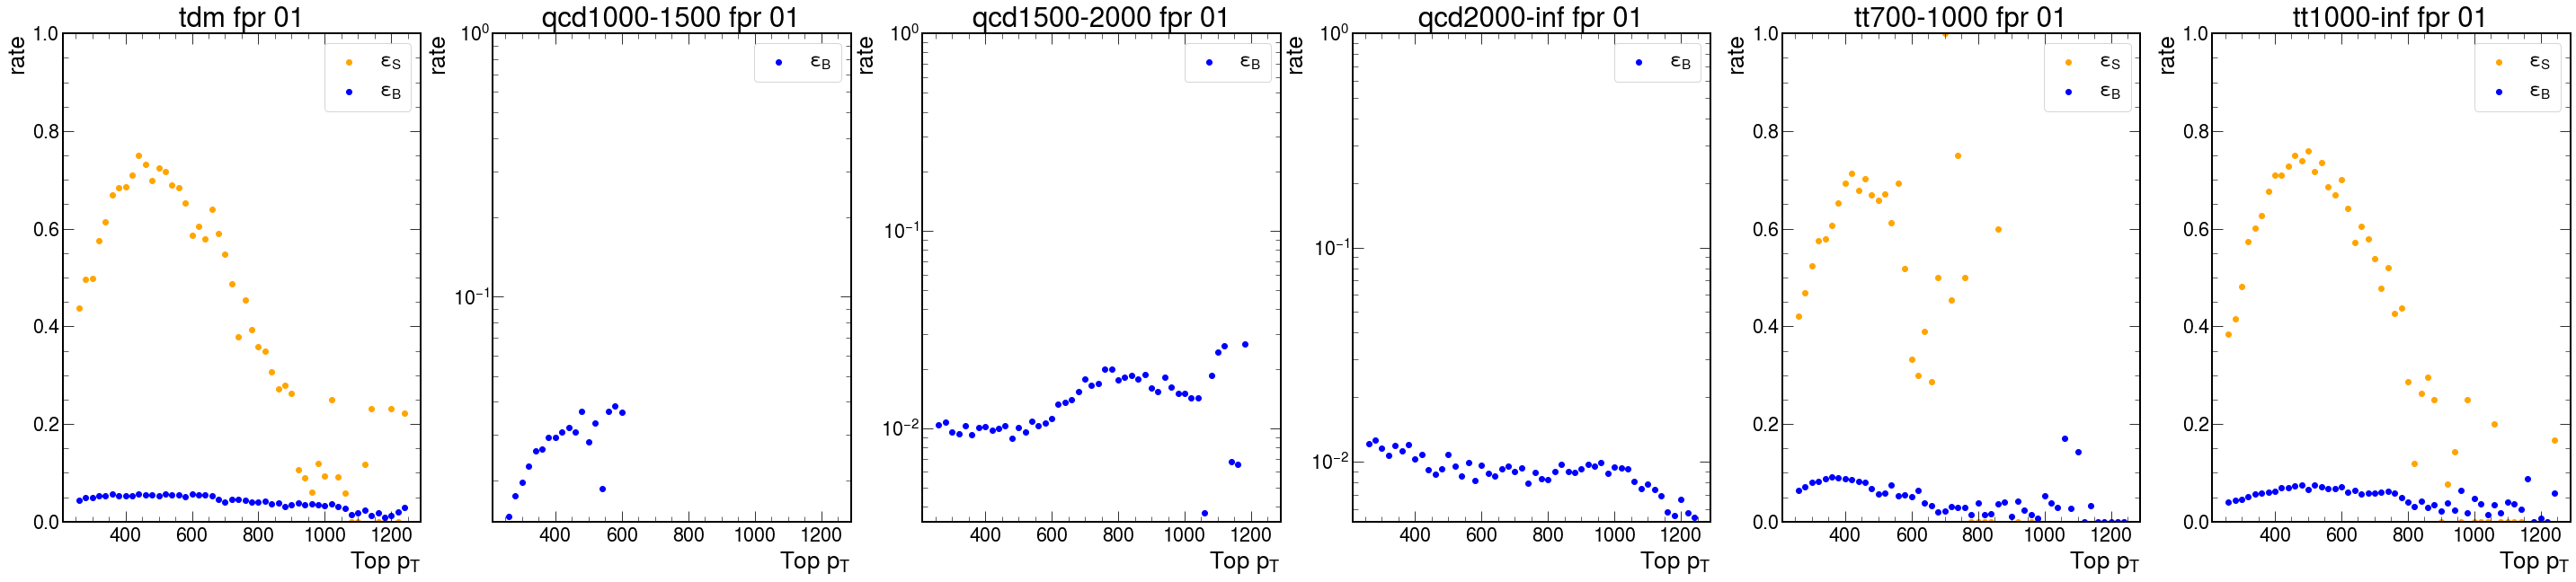

In [48]:
print(' pt signal/background efficiency Top High Pt with phase1 comb  phase2 score at different fixed values of false positive rate')
#for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
for i, s in enumerate(samples.keys()):
    y_s, y_b, x = plt_ptbins(events[s], model='highpt_comb', trs=[trs_highpt['fpr 10'], trs_highpt_2['fpr 10']], bins = 50, minpt=250, maxpt=1250)    
    if 'qcd' not in s: ax[i].scatter(x, y_s, label = '$\epsilon_S$', c='orange')
    ax[i].scatter(x, y_b, label = '$\epsilon_B$', c='blue')
    ax[i].legend(frameon = True)
    if 'qcd' in s:ax[i].set_yscale('Log')
    ax[i].set_xlabel('Top $p_T$')
    ax[i].set_ylabel('rate')
    ax[i].set_ylim([0, 1])
    ax[i].set_title(s+' '+fpr)

In [22]:
def calculate_ptbinsTopTagger(events, s, model, trs_lowpt, trs_highpt):
    #high pt    
    minpt = 250
    maxpt = 1000
    step = 50
    bins = np.arange(minpt, maxpt, step)
    tophighpt = events.FatJet
    if not 'qcd' in s:
        true_top = tophighpt.matched==3
        false_top = tophighpt.matched<3
    else:
        true_top = events.FatJet.pt>0
        false_top = events.FatJet.pt>0
    top_overtrs = tophighpt.deepTag_TvsQCD>trs_highpt #FatJet_deepTag_TvsQCD
    pt_bin_centre_highpt = (bins+(step/2)) .tolist()  # x axis variable
    sgneff_highpt = []
    bkgeff_highpt = []
    for b in bins:
        if np.sum(true_top)>0:
            num = np.sum((tophighpt.pt[true_top*top_overtrs]>b)*(tophighpt.pt[true_top*top_overtrs]<b+step))
            den = np.sum((tophighpt.pt[true_top]>b)*(tophighpt.pt[true_top]<b+step))
            if den!=0:
                sgneff_highpt.append(num/den)
            else:
                sgneff_highpt.append(-1)
        num = np.sum((tophighpt.pt[false_top*top_overtrs]>b)*(tophighpt.pt[false_top*top_overtrs]<b+step))
        den = np.sum((tophighpt.pt[false_top]>b)*(tophighpt.pt[false_top]<b+step))
        if den!=0:
            bkgeff_highpt.append(num/den)
        else:
            bkgeff_highpt.append(-1)
    return sgneff_highpt, bkgeff_highpt, pt_bin_centre_highpt

/tmp/ipykernel_524/88901789.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


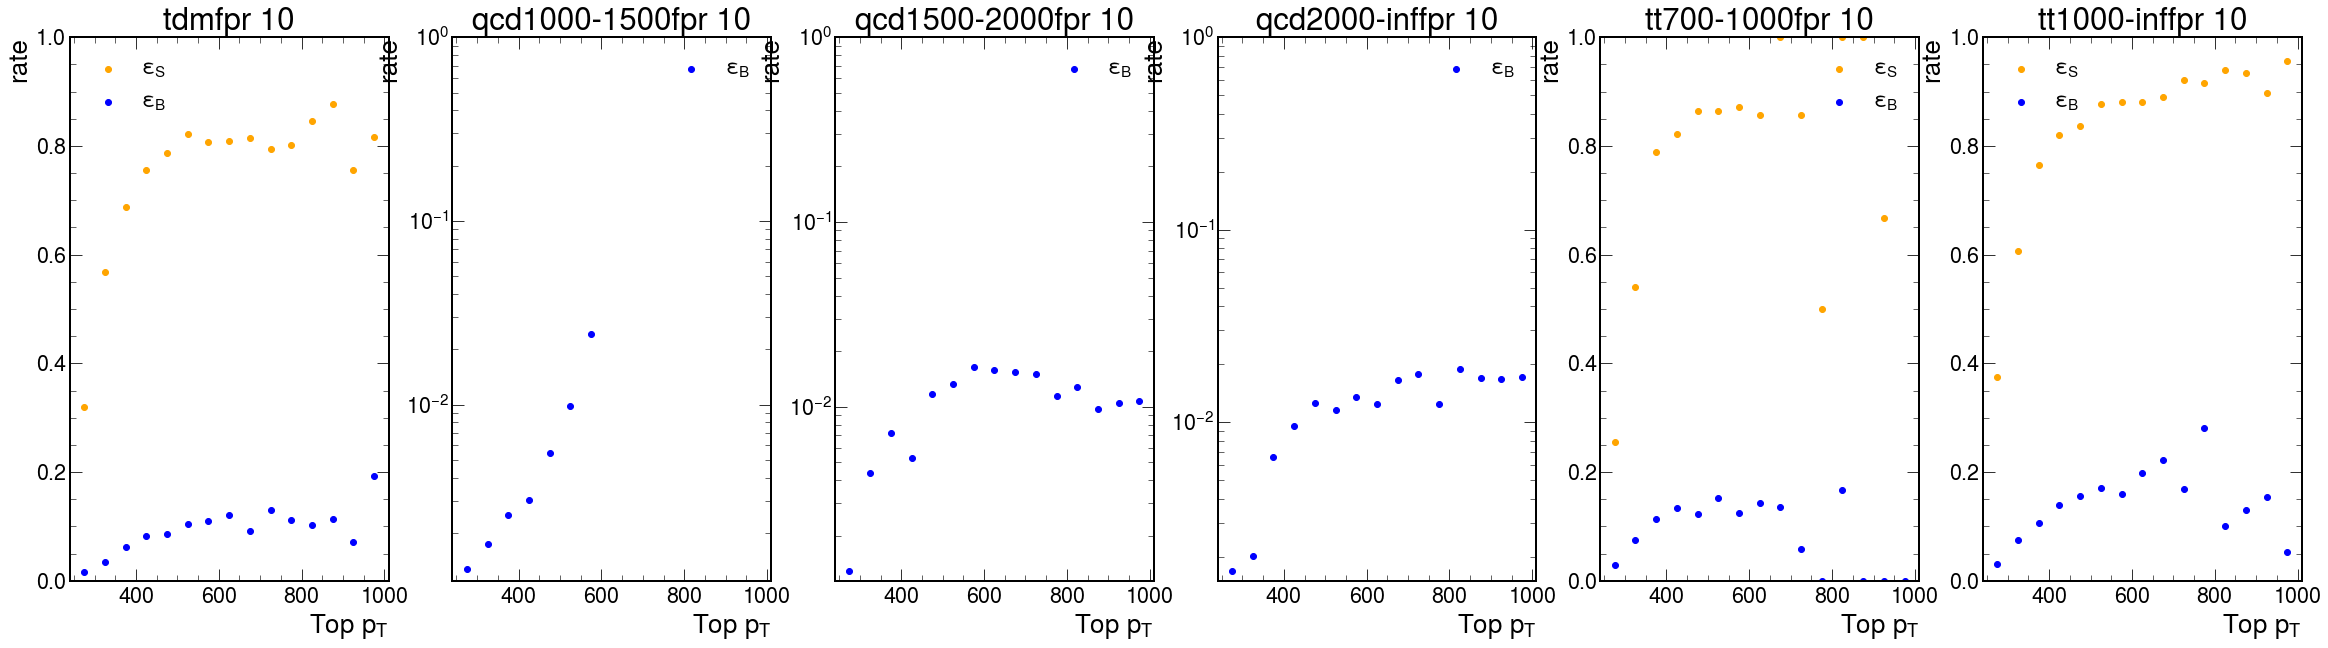

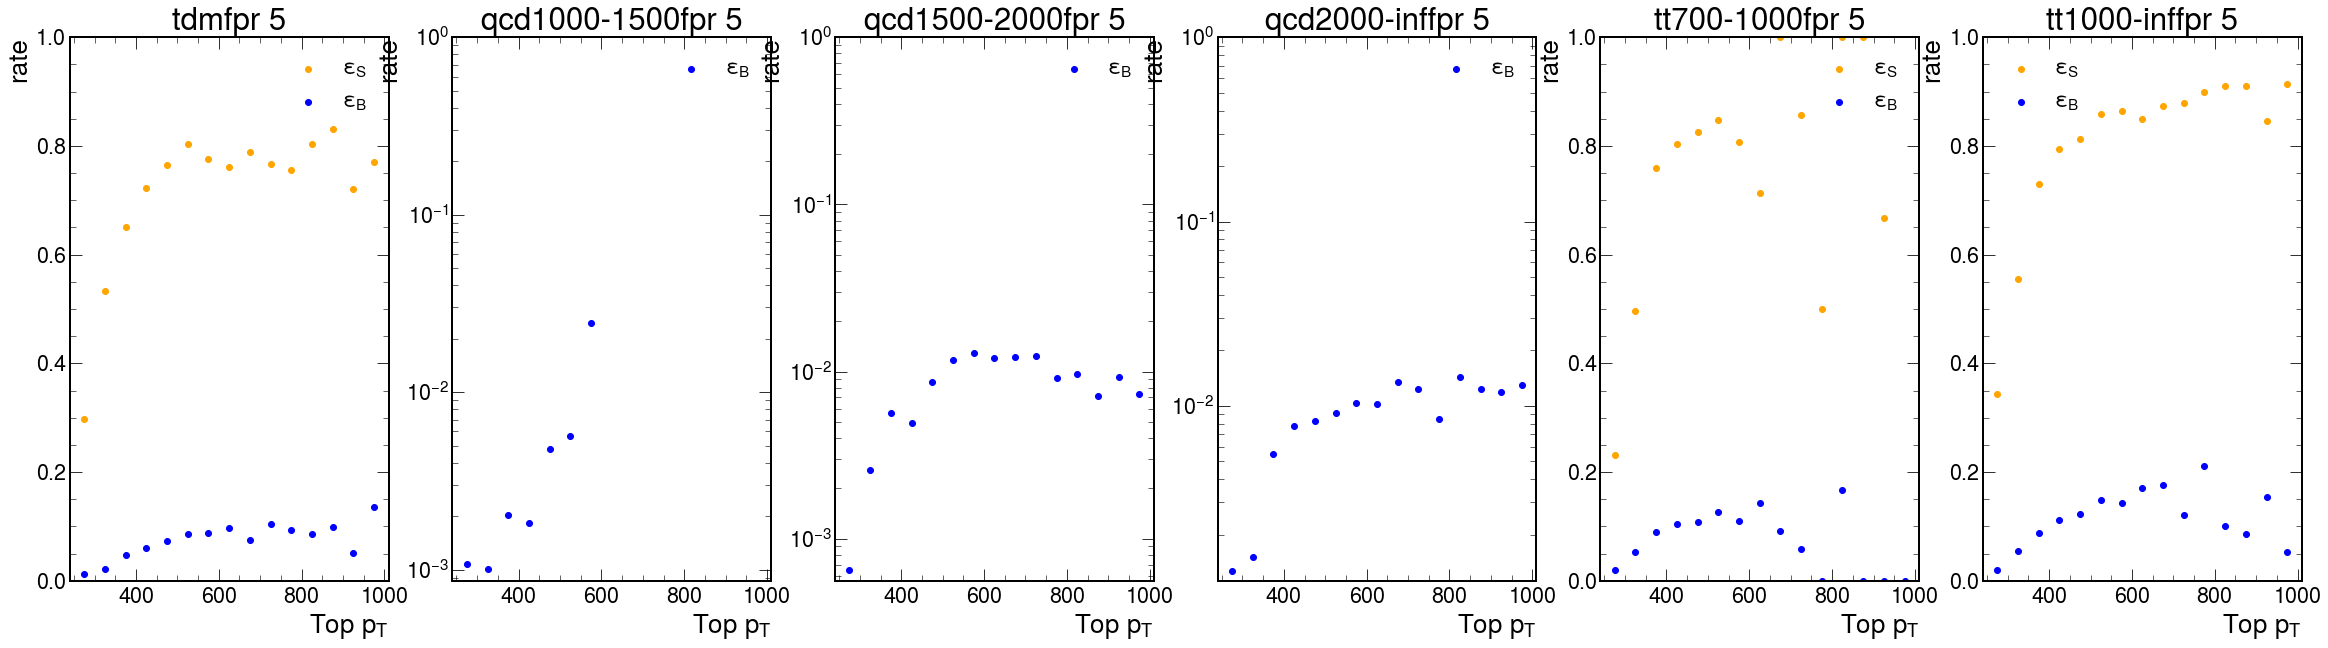

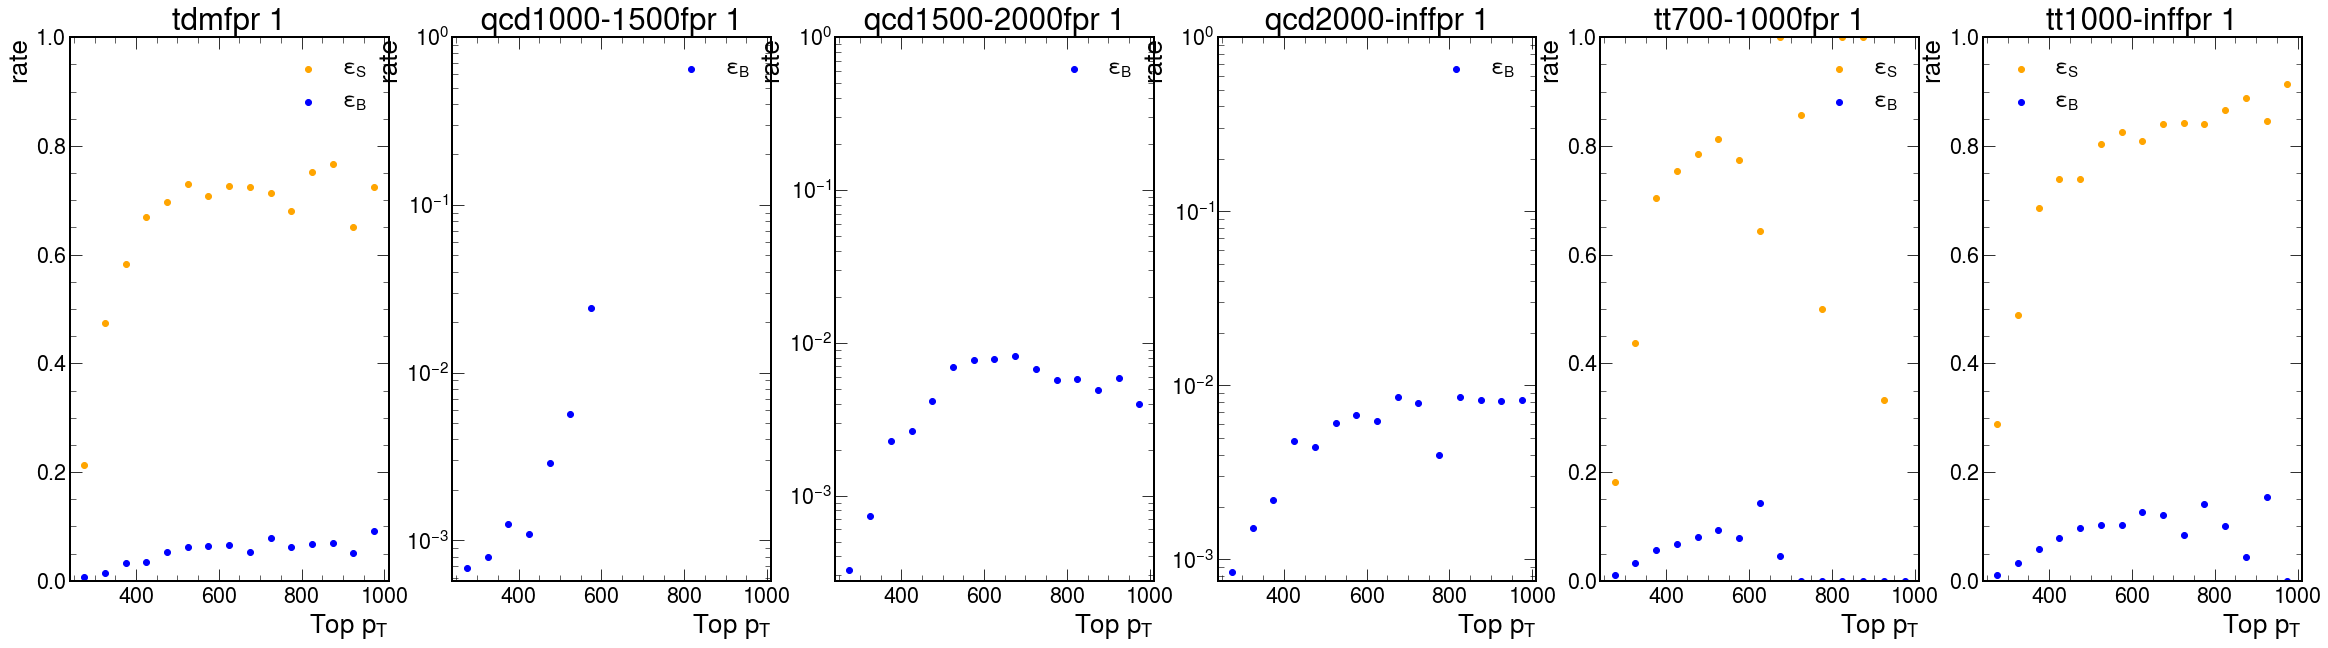

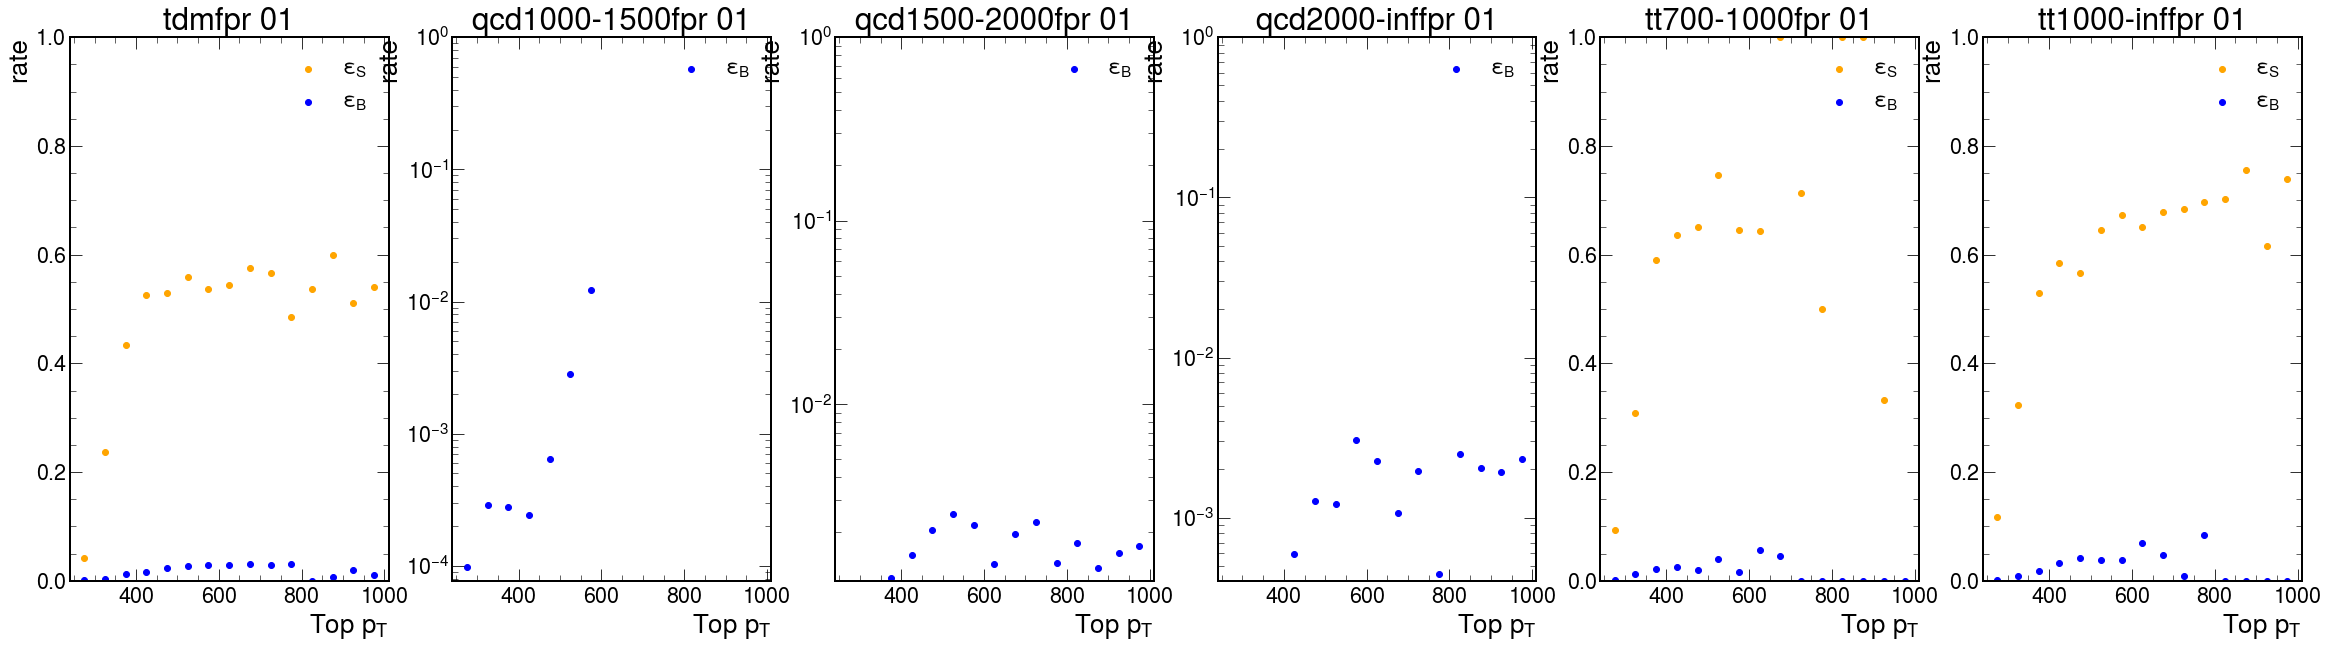

In [42]:
fpr = 'fpr 10'
t = {'fpr 10':0.9, 'fpr 5':0.93, 'fpr 1':0.96, 'fpr 01':0.99}
for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
    fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (40,10))
    for i, s in enumerate(samples.keys()):
        y1, y1_, x1 = calculate_ptbinsTopTagger(events[s], s, model='DNN', trs_lowpt=trs_lowptDNN[fpr], trs_highpt=t[fpr])    
        if 'qcd' not in s: ax[i].scatter(x1, y1, label = '$\epsilon_S$', c='orange')
        ax[i].scatter(x1, y1_, label = '$\epsilon_B$', c='blue')
        ax[i].legend()
        if 'qcd' in s:ax[i].set_yscale('Log')
        ax[i].set_xlabel('Top $p_T$')
        ax[i].set_ylabel('rate')
        ax[i].set_ylim([0, 1])
        ax[i].set_title(s+fpr)

In [ ]:
# tentativo combinatorio

In [8]:
def plt_ptbins(events, model, trs, bins, minpt, maxpt):# model= 'highpt_phase1','highpt_phase2','lowpt_LSTM','lowpt_DNN'
    step = (maxpt-minpt)/bins
    x_array = np.arange(minpt, maxpt, step)
    #print(x_array)
    # top evaluation
    if 'highpt' in model:
        top = events.TopHighPt
        if 'phase2' in model:
            top_over_trs = top.score2>trs
        elif 'phase1' in model:
            top_over_trs = top.score>trs
        elif 'comb' in model :
            top_over_trs_1 = top.score>trs[0]
            top_over_trs_2 = top.score>trs[1]
            top_over_trs = top_over_trs_1*top_over_trs_2
    elif 'lowpt' in model:
        #print('lowpt')
        top = events.TopLowPt
        #print(top)
        if 'DNN' in model:
            top_over_trs = top.scoreDNN>trs
        elif 'LSTM' in model:
            top_over_trs = top.scoreLSTM>trs
    #print(top_over_trs)
    true_top = top.truth==1
    false_top = top.truth==0
    #print(true_top, false_top)
    bins_centre = (x_array+(step/2)).tolist()
    sgneff=[]
    bkgeff=[]
    for b in x_array:
        #print(b)
        #print(np.sum(true_top))
        if np.sum(true_top)>0:
            num = np.sum((top.pt[true_top*top_over_trs]>b)*(top.pt[true_top*top_over_trs]<b+step))
            den = np.sum((top.pt[true_top]>b)*(top.pt[true_top]<b+step))
            #print(b, den)
            if den!=0:   
                sgneff.append(num/den)
            else:
                sgneff.append(-1)
        num = np.sum((top.pt[false_top*top_over_trs]>b)*(top.pt[false_top*top_over_trs]<b+step))
        den = np.sum((top.pt[false_top]>b)*(top.pt[false_top]<b+step))
        if den!=0:
            bkgeff.append(num/den)
        else:
            bkgeff.append(-1)
    #print(sgneff)
    return sgneff, bkgeff, bins_centre

def plt_ptbinsTopTagger(events, trs, bins, minpt, maxpt):
    #high pt    
    step = (maxpt-minpt)/bins
    x_array = np.arange(minpt, maxpt, step)
    
    tophighpt = events.FatJet
    if not 'qcd' in s:
        true_top = tophighpt.matched==3
        false_top = tophighpt.matched<3
    else:
        true_top = events.FatJet.pt>0
        false_top = events.FatJet.pt>0
    top_overtrs = tophighpt.deepTag_TvsQCD>trs #FatJet_deepTag_TvsQCD
    pt_bin_centre_highpt = (x_array+(step/2)) .tolist()  # x axis variable
    sgneff_highpt = []
    bkgeff_highpt = []
    for b in x_array:
        if np.sum(true_top)>0:
            num = np.sum((tophighpt.pt[true_top*top_overtrs]>b)*(tophighpt.pt[true_top*top_overtrs]<b+step))
            den = np.sum((tophighpt.pt[true_top]>b)*(tophighpt.pt[true_top]<b+step))
            if den!=0:
                sgneff_highpt.append(num/den)
            else:
                sgneff_highpt.append(-1)
        num = np.sum((tophighpt.pt[false_top*top_overtrs]>b)*(tophighpt.pt[false_top*top_overtrs]<b+step))
        den = np.sum((tophighpt.pt[false_top]>b)*(tophighpt.pt[false_top]<b+step))
        if den!=0:
            bkgeff_highpt.append(num/den)
        else:
            bkgeff_highpt.append(-1)
    return sgneff_highpt, bkgeff_highpt, pt_bin_centre_highpt

In [45]:
np.sum(events['tdm'].TopLowPt.truth==1)

0

 pt signal/background efficiency Top Low Pt with DNN score at different fixed values of false positive rate


/tmp/ipykernel_524/2481025478.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim([0, 1])


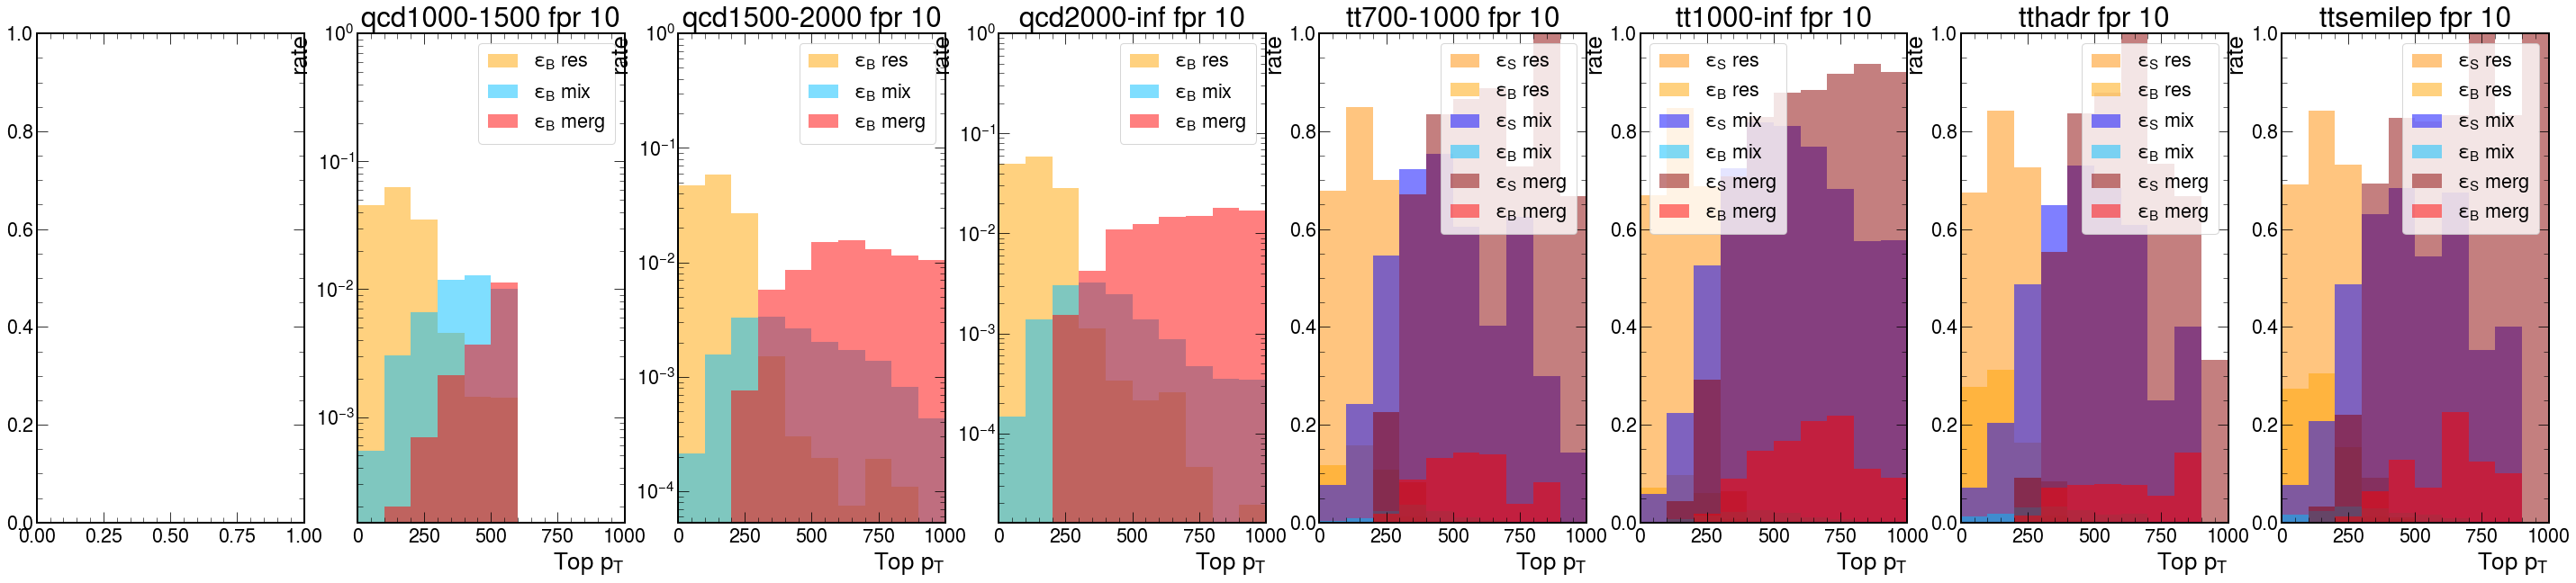

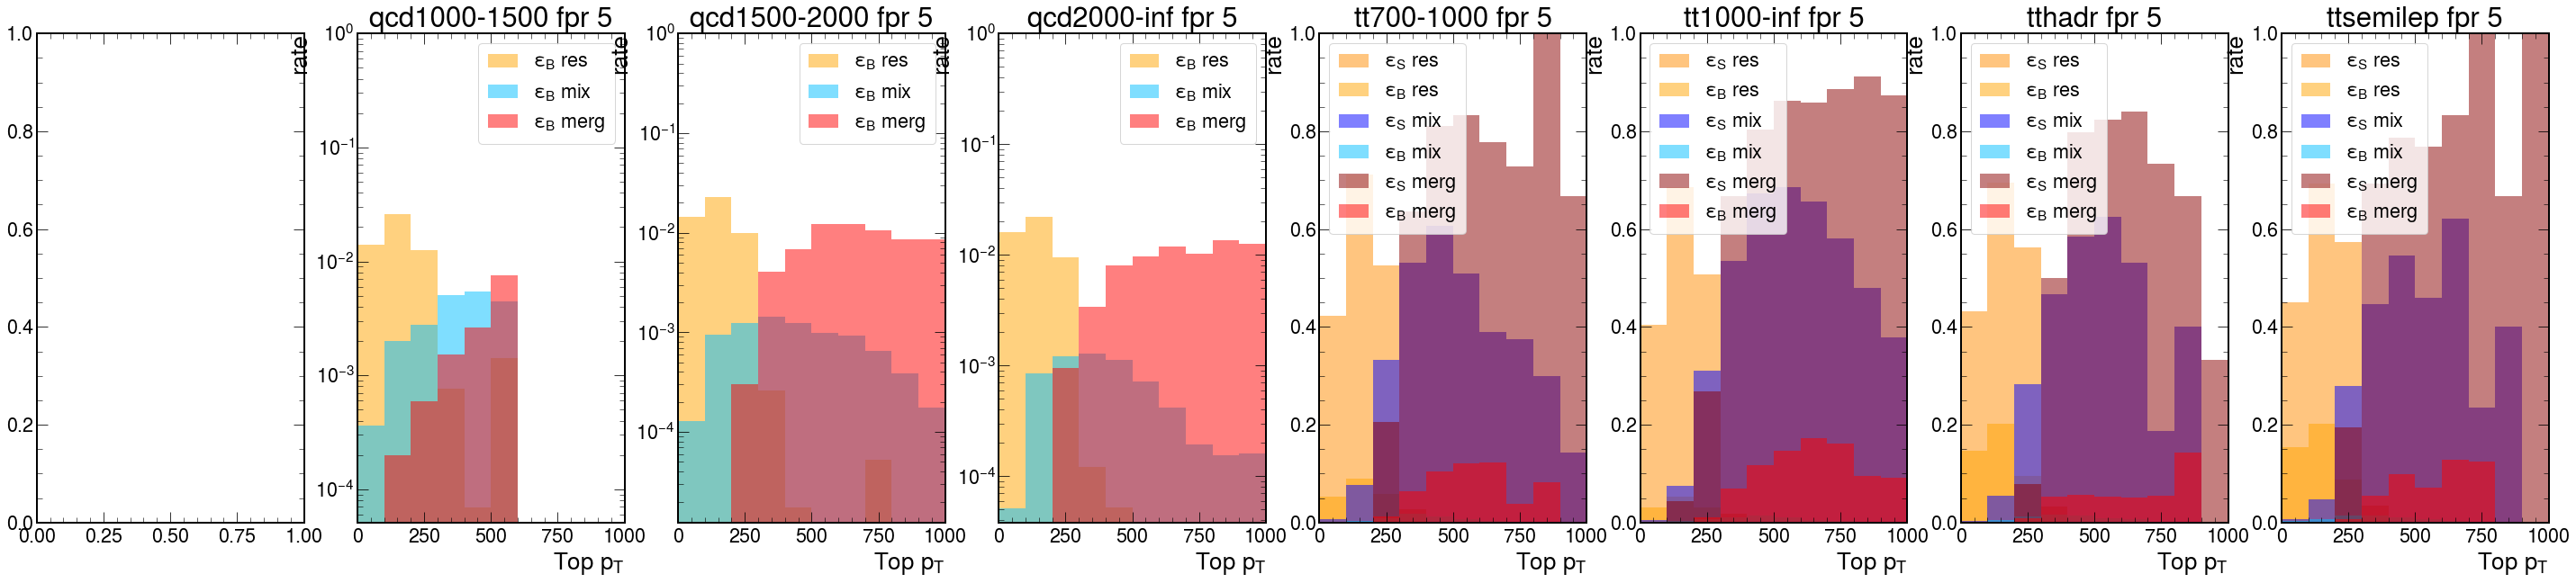

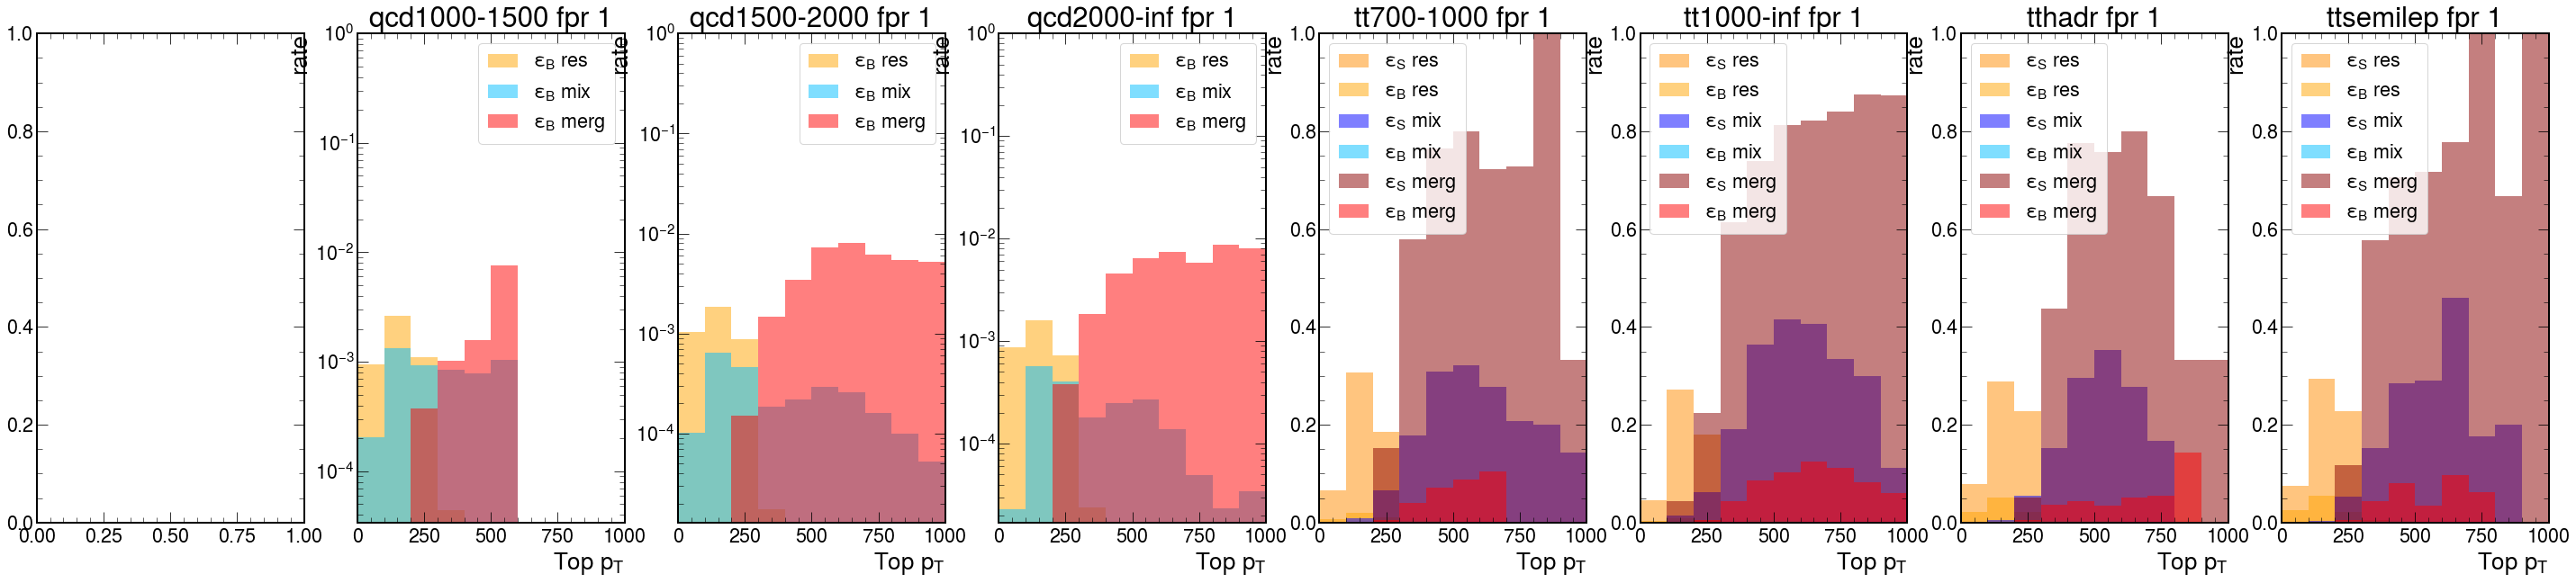

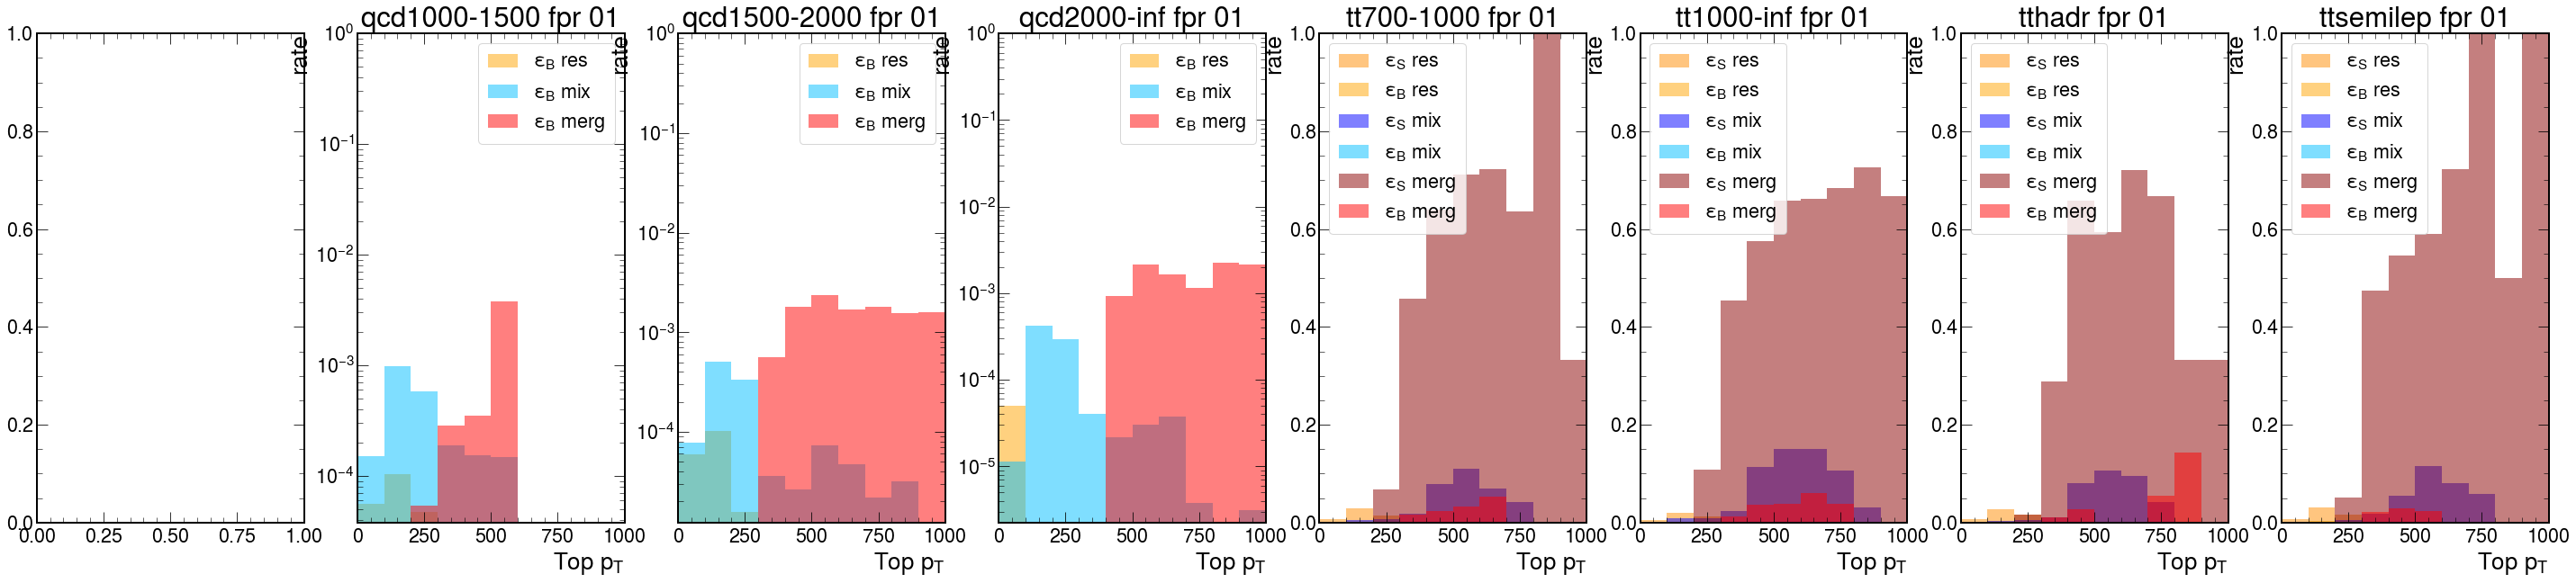

In [15]:
minpt = 0
maxpt = 1000
bins=10
t = {'fpr 10':0.9, 'fpr 5':0.93, 'fpr 1':0.96, 'fpr 01':0.99}
print(' pt signal/background efficiency Top Low Pt with DNN score at different fixed values of false positive rate')
for fpr in ['fpr 10', 'fpr 5', 'fpr 1', 'fpr 01']:
    fig, ax = plt.subplots(ncols = len(samples.keys()), figsize = (50,10))
    for i, s in enumerate(samples.keys()):
        if 'tdm' in s: continue
        y_s_l, y_b_l, x_l = plt_ptbins(events[s], model='lowpt_DNN', trs=trs_lowptDNN[fpr], bins = bins, minpt=minpt, maxpt=maxpt)
        y_s_h, y_b_h, x_h = plt_ptbins(events[s], model='highpt_phase2', trs=trs_highpt_2[fpr], bins = bins, minpt=minpt, maxpt=maxpt)
        if 'qcd' not in s: ax[i].bar(x_l, y_s_l, label = '$\epsilon_S$ res', width = (maxpt-minpt)/bins, color='darkorange', alpha=0.5)#, fill=False
        ax[i].bar(x_l, y_b_l, label = '$\epsilon_B$ res', width = (maxpt-minpt)/bins, color='orange', alpha=0.5)#, fill=False
        if 'qcd' not in s: ax[i].bar(x_h, y_s_h, label = '$\epsilon_S$ mix', width = (maxpt-minpt)/bins, color='blue', alpha=0.5)#, fill=False
        ax[i].bar(x_h, y_b_h, label = '$\epsilon_B$ mix', width = (maxpt-minpt)/bins, color='deepskyblue', alpha=0.5)#, fill=False
        y_s_m, y_b_m, x_m = plt_ptbinsTopTagger(events[s], trs=t[fpr], bins = bins, minpt=minpt, maxpt=maxpt)
        if 'qcd' not in s: ax[i].bar(x_m, y_s_m, label = '$\epsilon_S$ merg', width = (maxpt-minpt)/bins, color='darkred', alpha=0.5)#, fill=False
        ax[i].bar(x_m, y_b_m, label = '$\epsilon_B$ merg', width = (maxpt-minpt)/bins, color='red', alpha=0.5)#, fill=False
        ax[i].legend(frameon = True)
        if 'qcd' in s:ax[i].set_yscale('Log')
        ax[i].set_xlabel('Top $p_T$')
        ax[i].set_ylabel('rate')
        ax[i].set_ylim([0, 1])
        ax[i].set_xlim([0, 1000])
        ax[i].set_title(s+' '+fpr)

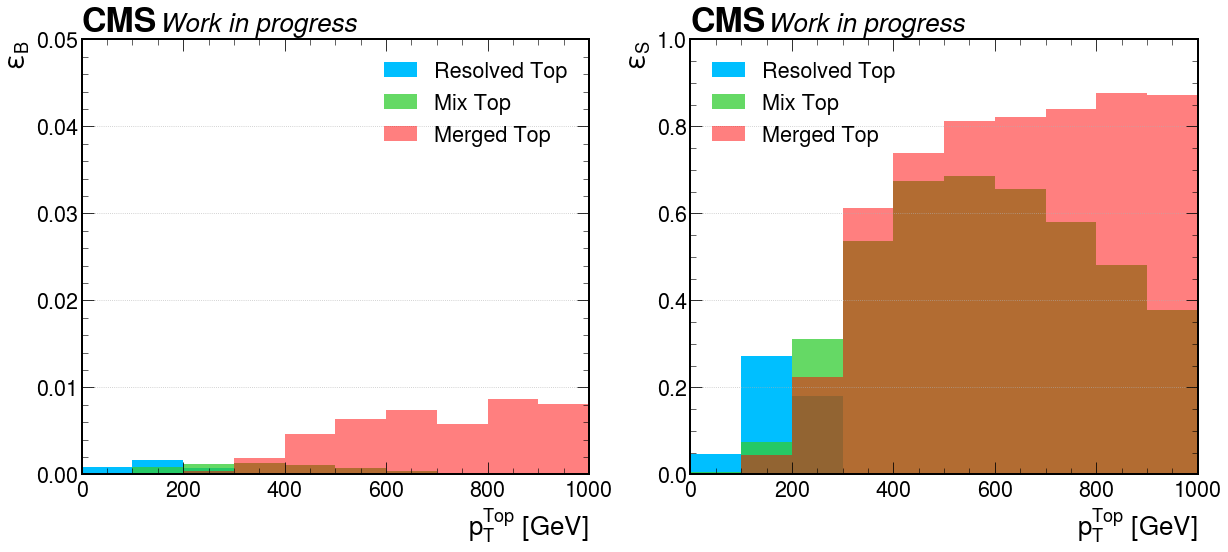

In [11]:
#toplot = ['qcd1000-1500', 'qcd1500-2000', 'qcd2000-inf', 'tt700-1000', 'tt1000-inf', 'tthadr', 'ttsemilep']
toplot = ['qcd2000-inf', 'tt1000-inf']
minpt = 0
maxpt = 1000
bins = 10
t = {'fpr 10':0.9, 'fpr 5':0.93, 'fpr 1':0.96, 'fpr 01':0.99}
#print(' pt signal/background efficiency Top Low Pt with DNN score at different fixed values of false positive rate')
#fig, ax = plt.subplots(ncols = len(samples.keys())-1, figsize = (70,10))
fig, ax = plt.subplots(ncols = 2, figsize = (20,8))
for i, s in enumerate(toplot):
    if 'tdm' in s: continue
    y_s_l, y_b_l, x_l = plt_ptbins(events[s], model='lowpt_DNN', trs=trs_lowptDNN['fpr 1'], bins = bins, minpt=minpt, maxpt=maxpt)
    #y_s_h, y_b_h, x_h = plt_ptbins(events[s], model='highpt_phase2', trs=trs_highpt_2['fpr 10'], bins = bins, minpt=minpt, maxpt=maxpt)
    y_s_h, y_b_h, x_h = plt_ptbins(events[s], model='highpt_phase2', trs=trs_highpt_2['fpr 5'], bins = bins, minpt=minpt, maxpt=maxpt)
    if 'qcd' not in s: 
        ax[i].bar(x_l, y_s_l, label = 'Resolved Top', width = (maxpt-minpt)/bins, color='deepskyblue')#, fill=False
        ax[i].set_ylabel('$\epsilon_S $')
    if 'qcd' in s:
        ax[i].bar(x_l, y_b_l, label = 'Resolved Top', width = (maxpt-minpt)/bins, color='deepskyblue')#, fill=False
        ax[i].set_ylabel('$\epsilon_B$')
    if 'qcd' not in s: 
        ax[i].bar(x_h, y_s_h, label = 'Mix Top', width = (maxpt-minpt)/bins, color='limegreen', alpha=0.75)#, fill=False
        ax[i].set_ylabel('$\epsilon_S $')
    if 'qcd' in s:
        ax[i].bar(x_h, y_b_h, label = 'Mix Top', width = (maxpt-minpt)/bins, color='limegreen', alpha=0.75)#, fill=False
        ax[i].set_ylabel('$\epsilon_B$')
    y_s_m, y_b_m, x_m = plt_ptbinsTopTagger(events[s], trs=t['fpr 1'], bins = bins, minpt=minpt, maxpt=maxpt)
    if 'qcd' not in s: 
        ax[i].bar(x_m, y_s_m, label = 'Merged Top', width = (maxpt-minpt)/bins, color='red', alpha=0.5)#, fill=False
        ax[i].set_ylabel('$\epsilon_S$')
    if 'qcd' in s:
        ax[i].bar(x_m, y_b_m, label = 'Merged Top', width = (maxpt-minpt)/bins, color='red', alpha=0.5)#, fill=False
        ax[i].set_ylabel('$\epsilon_B$')
    ax[i].legend(frameon = False)
    #if 'qcd' in s:ax[i].set_yscale('Log')
    ax[i].set_xlabel('$p^{Top}_T$ [GeV]')
    #ax[i].set_ylabel('rate')
    ax[i].set_ylim([0, 1])
    
    if 'qcd' in s:ax[i].set_ylim([0,0.05])
    ax[i].set_xlim([0, 1000])
    #ax[i].set_title(s)
    hep.cms.text('Work in progress', ax=ax[i])
    ax[i].grid(axis='y')
#plt.savefig('/eos/home-a/acagnott/DarkMatter/testSelection/tagger_efficiency.png')
#plt.savefig('/eos/home-a/acagnott/DarkMatter/testSelection/tagger_efficiency.pdf')

In [23]:
y_s_l, y_b_l, x_l

([],
 [0.08135731807031889,
  0.10390596745027125,
  0.12087481382770243,
  0.13290904023041902,
  0.13799900258852027,
  0.140005717701484,
  0.14390645199200847,
  0.13886792452830188,
  0.12205743879472693,
  0.09881945394047131,
  0.07056,
  0.04247876061969016,
  0.019269776876267748,
  0.008760951188986232,
  0.006309454474859251,
  0.005311497178267124,
  0.0035048191262986605,
  0.003864872602347552,
  0.0027561608300907914,
  0.0030515167833423083,
  0.0028583095140873828,
  0.0029465095194922937,
  0.0023885350318471337,
  0.0008933889219773674,
  0.0003312355084465055,
  0.0,
  0.0004088307440719542,
  0.00045829514207149406,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0009049773755656109,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [12.5,
  37.5,
  62.5,
  87.5,
  112.5,
  137.5,
  162.5,
  187.5,
  212.5,
  237.5,
  262.5,
  287.5,
  312.5,
  337.5,
  362.5,
  387.5,
  412.5,
  437.5,
  462.5,
  487.5,
  512.5,
  537.5,
  562.5,
  587.5,
  612.5,
  637.5,
  662.5,
  687.5,
  71

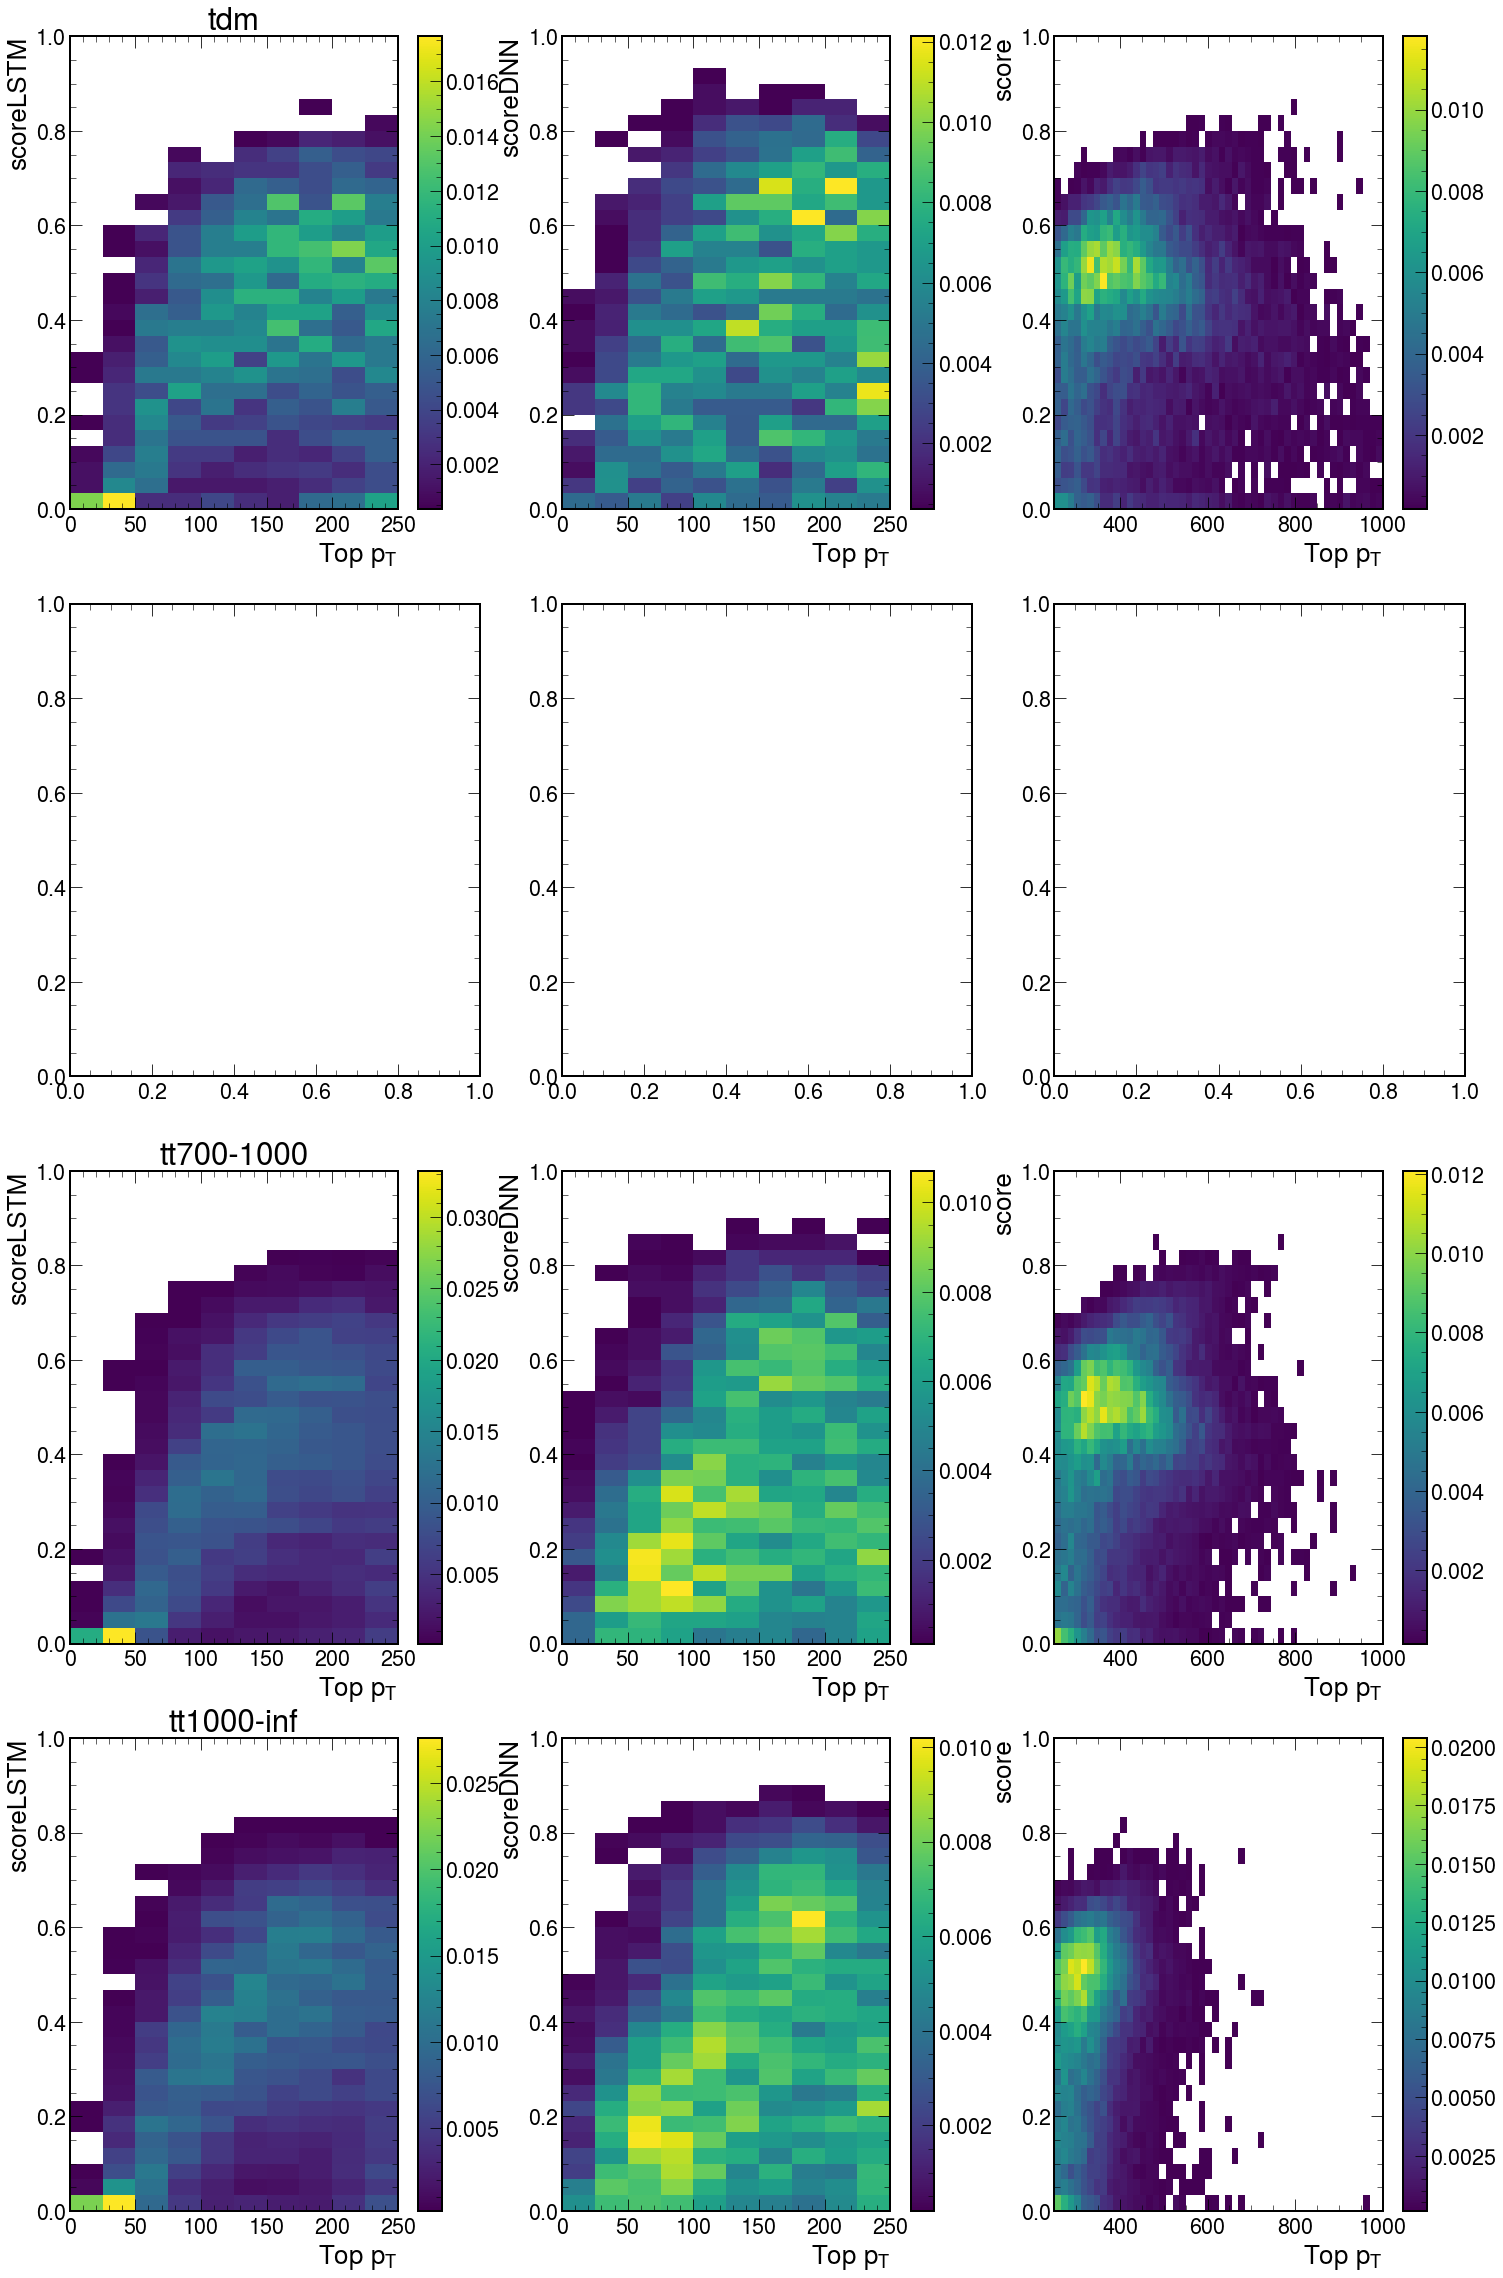

In [102]:
bins, rg = [20,50], [[0, 250], [0,1]]
fig, ax = plt.subplots(ncols = 3, nrows = 4, figsize=(25,40))
rg1 = [[0,250],[0,1]]
rg2 = [[250, 1000],[0,1]]
bins1 = [10, 30]
bins2 = [50, 30]
for i,s in enumerate(samples.keys()):
    if 'qcd' in s : continue
    x1, y1 = ak.flatten(events[s].TopLowPt.pt[events[s].TopLowPt.truth==1]), ak.flatten(events[s].TopLowPt.scoreLSTM[events[s].TopLowPt.truth==1])
    x2, y2 = ak.flatten(events[s].TopLowPt.pt[events[s].TopLowPt.truth==1]), ak.flatten(events[s].TopLowPt.scoreDNN[events[s].TopLowPt.truth==1])
    x3, y3 = ak.flatten(events[s].TopHighPt.pt[events[s].TopHighPt.truth==1]), ak.flatten(events[s].TopHighPt.score[events[s].TopHighPt.truth==1])
    h=ax[i, 0].hist2d(x1, y1, range = rg1, bins= bins1,
            cmin=0.0001, density = True)
    fig.colorbar(h[3], ax=ax[i, 0])
    ax[i, 0].set_title(s)
    ax[i, 0].set_xlabel('Top $p_T$')
    ax[i, 0].set_ylabel('scoreLSTM')
    h=ax[i, 1].hist2d(x2, y2, range = rg1, bins= bins1,
            cmin=0.0001, density = True)
    fig.colorbar(h[3], ax=ax[i, 1])
    ax[i, 1].set_xlabel('Top $p_T$')
    ax[i, 1].set_ylabel('scoreDNN')
    h=ax[i, 2].hist2d(x3, y3, range = rg2, bins= bins2,
            cmin=0.0001, density = True)
    fig.colorbar(h[3], ax=ax[i, 2])
    ax[i, 2].set_xlabel('Top $p_T$')
    ax[i, 2].set_ylabel('score')

In [76]:
ak.flatten(events['tdm'].TopHighPt.pt[events[s].TopHighPt.truth==1]), ak.flatten(events[s].TopHighPt.score[events[s].TopHighPt.truth==1])

(<Array [307, 307, 298, 307, ... 407, 406, 407] type='22628 * float32[parameters=...'>,
 <Array [0.109, 0.0888, 0.457, ... 0.526, 0.63] type='22628 * float32[parameters=...'>)

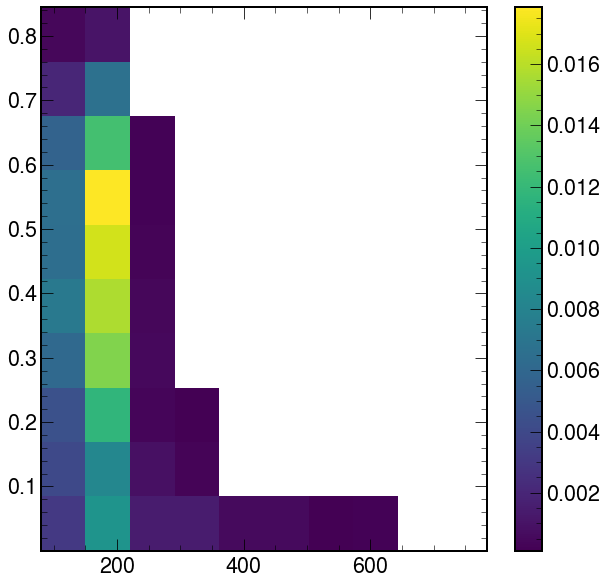

In [33]:
bins, rg = [500,50], [[0, 250], [0,1]]
fig, ax = plt.subplots()

h=ax.hist2d(ak.flatten(events.TopLowPt.mass[events.TopLowPt.truth==1]), 
            ak.flatten(events.TopLowPt.scoreLSTM[events.TopLowPt.truth==1]),
            cmin=0.0001, density = True)
fig.colorbar(h[3], ax=ax)

In [ ]:
plt.hist(ak.flatten(events[sdm].Top.score[events[sdm].Top.truth==1]), histtype='step', density=True, label = 'tDM sgn')
plt.hist(ak.flatten(events[b].Top.score[events[b].Top.truth==0]), histtype='step', density=True, label = 'QCD bkg')
plt.hist(ak.flatten(events[stt1].Top.score[events[stt1].Top.truth==1]), histtype='step', density=True, label = 'tt700-1000 sgn')
plt.hist(ak.flatten(events[stt2].Top.score[events[stt2].Top.truth==1]), histtype='step', density=True, label = 'tt1000-inf sgn')
plt.yscale('Log')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True)
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True)
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True)
ax.legend()
ax.set_title('Signals')

In [ ]:
fig, ax = plt.subplots()
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True)
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True)
ax.hist(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True)
ax.legend()
ax.set_yscale('Log')
ax.set_title('Bkg from tDM')

In [ ]:
fig, ax = plt.subplots()
ax.hist(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True)
ax.hist(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True)
ax.hist(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxFatJet!=-1)*(events[b].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True)
ax.legend()
ax.set_yscale('Log')
ax.set_title('Bkg from QCD')

In [ ]:
rg = [0,1000]
bins = 100
fig, ax = plt.subplots(ncols =3, figsize = (30,10))

ax[0].hist(ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].hist(ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].hist(ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[0].legend()
#ax.set_yscale('Log')
ax[0].set_title('Signals Top pt from DM')

ax[1].hist(ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].hist(ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].hist(ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet!=-1)*(events[stt1].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[1].legend()
#ax.set_yscale('Log')
ax[1].set_title('Signals Top pt from TT_Mtt700_1000')

ax[2].hist(ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxJet2==-1)]),
        label = '2j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].hist(ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet==-1)]),
        label = '3j0fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].hist(ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet!=-1)*(events[stt2].Top.idxJet2!=-1)]),
        label = '3j1fj', histtype='step', density=True,
        range = rg, bins=bins)
ax[2].legend()
#ax.set_yscale('Log')
ax[2].set_title('Signals Top pt from TT_Mtt1000_inf')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
             ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('Signals tDM 2j1fj')
h = ax[1].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
           ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Signals tDM 3j0fj')
ax[2].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_title('Signals tDM 3j1fj')
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==1)*(events[stt1].Top.idxJet2==-1)]),
             ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('Signals tt 700-1000 2j1fj')
h = ax[1].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet==-1)]),
           ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Signals tt 700-1000 3j0fj')
ax[2].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet!=-1)*(events[stt1].Top.idxJet2!=-1)]),
        ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==1)*(events[stt1].Top.idxFatJet!=-1)*(events[stt1].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_title('Signals tt 700-1000 3j1fj')
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==1)*(events[stt2].Top.idxJet2==-1)]),
             ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_title('Signals tt 1000-inf 2j1fj')
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
h = ax[1].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet==-1)]),
           ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Signals tt 1000-inf 3j0fj')
ax[2].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet!=-1)*(events[stt2].Top.idxJet2!=-1)]),
        ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==1)*(events[stt2].Top.idxFatJet!=-1)*(events[stt2].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
ax[2].set_title('Signals tt 1000-inf 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxJet2==-1)]),
             ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==0)*(events[sdm].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('Bkg from tDM 2j1fj')
h = ax[1].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet==-1)]),
           ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Bkg from tDM 3j0fj')
ax[2].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        ak.flatten(events[sdm].Top.pt[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
ax[2].set_title('Bkg from tDM 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==0)*(events[stt1].Top.idxJet2==-1)]),
             ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==0)*(events[stt1].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('Bkg from tt700-1000 2j1fj')
h = ax[1].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==0)*(events[stt1].Top.idxFatJet==-1)]),
           ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==0)*(events[stt1].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Bkg from tt700-1000 3j0fj')
ax[2].hist2d(ak.flatten(events[stt1].Top.score[(events[stt1].Top.truth==0)*(events[stt1].Top.idxFatJet!=-1)*(events[stt1].Top.idxJet2!=-1)]),
        ak.flatten(events[stt1].Top.pt[(events[stt1].Top.truth==0)*(events[stt1].Top.idxFatJet!=-1)*(events[stt1].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
ax[2].set_title('Bkg from tt700-1000 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==0)*(events[stt2].Top.idxJet2==-1)]),
             ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==0)*(events[stt2].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('Bkg from tt1000-Inf 2j1fj')
h = ax[1].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==0)*(events[stt2].Top.idxFatJet==-1)]),
           ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==0)*(events[stt2].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('Bkg from tt1000-Inf 3j0fj')
ax[2].hist2d(ak.flatten(events[stt2].Top.score[(events[stt2].Top.truth==0)*(events[stt2].Top.idxFatJet!=-1)*(events[stt2].Top.idxJet2!=-1)]),
        ak.flatten(events[stt2].Top.pt[(events[stt2].Top.truth==0)*(events[stt2].Top.idxFatJet!=-1)*(events[stt2].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
ax[2].set_title('Bkg from tt1000-Inf 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxJet2==-1)]),
             ak.flatten(events[b].Top.pt[(events[b].Top.truth==0)*(events[b].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top $p_T$')
ax[0].set_title('QCD 2j1fj')
h = ax[1].hist2d(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxFatJet==-1)]),
           ak.flatten(events[b].Top.pt[(events[b].Top.truth==0)*(events[b].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top $p_T$')
ax[1].set_title('QCD 3j0fj')
ax[2].hist2d(ak.flatten(events[b].Top.score[(events[b].Top.truth==0)*(events[b].Top.idxFatJet!=-1)*(events[b].Top.idxJet2!=-1)]),
        ak.flatten(events[b].Top.pt[(events[b].Top.truth==0)*(events[b].Top.idxFatJet!=-1)*(events[b].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top $p_T$')
ax[2].set_title('QCD 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
             ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==1)*(events[sdm].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_title('Signals tDM 2j1fj')
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top mass')
h = ax[1].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
           ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top mass')
ax[1].set_title('Signals tDM 3j0fj')
ax[2].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==1)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top mass')
ax[2].set_title('Signals tDM 3j1fj')
#ax.set_title('Signals Top pt')

In [ ]:
rg = [[0,1],[0,1000]]
bins = [10,50]
fig, ax = plt.subplots(ncols=3, figsize = (30,10))

h = ax[0].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxJet2==-1)]),
             ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==0)*(events[sdm].Top.idxJet2==-1)]),
             label = '2j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Top mass')
ax[0].set_title('Bkg from tDM 2j1fj')
h = ax[1].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet==-1)]),
           ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet==-1)]),
           label = '3j0fj', density=True, cmin=0.00001,range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[1])
ax[1].set_xlabel('score')
ax[1].set_ylabel('Top mass')
ax[1].set_title('Bkg from tDM 3j0fj')
ax[2].hist2d(ak.flatten(events[sdm].Top.score[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        ak.flatten(events[sdm].Top.mass[(events[sdm].Top.truth==0)*(events[sdm].Top.idxFatJet!=-1)*(events[sdm].Top.idxJet2!=-1)]),
        label = '3j1fj', density=True, cmin=0.00001, range = rg, bins=bins)
fig.colorbar(h[3],ax = ax[2])
ax[2].set_xlabel('score')
ax[2].set_ylabel('Top mass')
ax[2].set_title('Bkg from tDM 3j1fj')

In [ ]:
rg = [[0,1],[0,1]]
bins = [10,10]
fig, ax = plt.subplots(ncols=2, figsize = (20,10))
h = ax[0].hist2d(ak.flatten(events[s].FatJet.deepTag_TvsQCD[events[s].Top.idxFatJet[(events[s].Top.truth==1)*(events[s].Top.idxJet2==-1)]]),
            ak.flatten(events[s].Top.score[(events[s].Top.truth==1)*(events[s].Top.idxJet2==-1)]),
              range = rg, bins = bins, cmin=0.001, density= True)
fig.colorbar(h[3],ax = ax[0])
h = ax[1].hist2d(ak.flatten(events[s].FatJet.deepTag_TvsQCD[events[s].Top.idxFatJet[(events[s].Top.truth==1)*(events[s].Top.idxJet2!=-1)*(events[s].Top.idxFatJet!=-1)]]),
            ak.flatten(events[s].Top.score[(events[s].Top.truth==1)*(events[s].Top.idxJet2!=-1)*(events[s].Top.idxFatJet!=-1)]),
              range = rg, bins = bins, cmin=0.001, density= True)
fig.colorbar(h[3],ax = ax[1])

In [ ]:
# cluster studies
e = events[s][0]

In [ ]:
trs_file = open("/eos/home-a/acagnott/SWAN_projects/DM/DNNmodel/DNN_phase1_test/tresholds.pkl", "rb")
trs = pkl.load(trs_file)
trs10 = trs['fpr 10']
trs5 = trs['fpr 5']
trs1 = trs['fpr 1']
trs01 = trs['fpr 01']

In [ ]:
np.sum(e.Top.truth==1)

In [ ]:
idx0 = e.Top.idxJet0[e.Top.truth==1]
idx1 = e.Top.idxJet1[e.Top.truth==1] 
idx2 = e.Top.idxJet2[e.Top.truth==1]
idxFat = e.Top.idxFatJet[e.Top.truth==1]

fig, ax = plt.subplots(figsize = (40,20), ncols = 2, nrows=2)
for i in range(np.sum(e.Top.truth==1)):
    top0_phi = [e.Jet[idx0[i]].phi, e.Jet[idx1[i]].phi, e.Jet[idx2[i]].phi, e.FatJet[idxFat[i]].phi]
    top0_eta = [e.Jet[idx0[i]].phi, e.Jet[idx1[i]].eta, e.Jet[idx2[i]].eta, e.FatJet[idxFat[i]].eta]    
    fat,jet2 = True, True
    if idxFat[i]==-1:
        fat = False
    if idx2[i]==-1:
        jet2 = False
    if i == 0: r,c = 0,0
    elif i==1: r, c = 0,1
    elif i==2: r, c = 1,0
    else: r,c = 1,1
    
    if jet2:
        ax[r,c].scatter(top0_eta[:3], top0_phi[:3], marker = '*', s = 500, alpha=.5)
    else:
        ax[r,c].scatter(top0_eta[:2], top0_phi[:2], marker = '*', s = 500, alpha=.5)    
    
    if fat: ax[r,c].scatter(top0_eta[-1], top0_phi[-1], marker = 'o', s = 100, alpha=.5)
    ax[r,c].set_ylim ([-np.pi, np.pi])
    ax[r,c].set_xlim ([-10, 10])
#fig.colorbar(h[3], ax = ax)

In [ ]:
top_over_trs = e.Top.score>trs10
np.sum(top_over_trs)

In [ ]:
idx0 = e.Top.idxJet0[top_over_trs]
idx1 = e.Top.idxJet1[top_over_trs] 
idx2 = e.Top.idxJet2[top_over_trs]
idxFat = e.Top.idxFatJet[top_over_trs]
score = e.Top.score[top_over_trs]
fig, ax = plt.subplots(figsize = (40,20), ncols = 2, nrows=2)
for i in range(np.sum(top_over_trs)):
    top0_phi = [e.Jet[idx0[i]].phi, e.Jet[idx1[i]].phi, e.Jet[idx2[i]].phi, e.FatJet[idxFat[i]].phi]
    top0_eta = [e.Jet[idx0[i]].phi, e.Jet[idx1[i]].eta, e.Jet[idx2[i]].eta, e.FatJet[idxFat[i]].eta]    
    fat,jet2 = True, True
    if idxFat[i]==-1:
        fat = False
    if idx2[i]==-1:
        jet2 = False
    if i == 0: r,c = 0,0
    elif i==1: r, c = 0,1
    elif i==2: r, c = 1,0
    else: r,c = 1,1
    
    if jet2:
        ax[r,c].scatter(top0_eta[:3], top0_phi[:3], marker = '*', s = 500, alpha=.5)
    else:
        ax[r,c].scatter(top0_eta[:2], top0_phi[:2], marker = '*', s = 500, alpha=.5)    
    
    if fat: ax[r,c].scatter(top0_eta[-1], top0_phi[-1], marker = 'o', s = 100, alpha=.5)
    print(score[i])
    ax[r,c].set_ylim ([-np.pi, np.pi])
    ax[r,c].set_xlim ([-10, 10])
#fig.colorbar(h[3], ax = ax)